# Radiation stresses and wave forces

<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

In [1]:
run initialize/init_3c.ipynb

Packages successfully loaded


We continue on the application of the dispersion relationship in the cross-shore, which was discussed in week 3 and the Wave course. You can use Forward Euler to calculate a derivative, an example in the cell below to calculate dh/dx. Note that the last value of dh_dx remains 0, since there is no forward location. This can be ignored in this notebook.

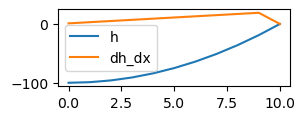

In [2]:
x = np.arange(0, 10 + 1, 1)
h = -100 + x**2

dh_dx = np.zeros(len(h))  # dh/dx
for i in range(len(dh_dx) - 1):
    dh_dx[i] = (h[i + 1] - h[i]) / (x[i + 1] - x[i])

plt.figure(figsize=(3, 1))
plt.plot(x, h, label="h")
plt.plot(x, dh_dx, label="dh_dx")
plt.legend();

## 1) Wave height (H), radiation stress (Sxx), mean water level by waves ($\eta$) for normal incident waves

In Waves (CIEM3000)you should have programmed a function to compute the wave height (H), radiation stress (Sxx), and mean water level ($\eta$) along the cross-shore for normal incident waves. Can you reproduce/copy these functions below? If not, you can load the content in the cell below and use this to answer the upcoming questions. However, we recommend to practice making those functions yourself. As inputs (arguments) you should consider the offshore deep-water wave height (H0), the wave period (T), the offshore water depth (h0) and the bed slope (slope). Below is a setup of the environmental conditions, for a spatial grid that is defined with x_range. The function check_W3_normal_wave_setup will check your answers. You can also ignore RuntimeWarnings, for example *"divide by zero encountered in scalar power"*.

C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\1227063608.py:13: RuntimeWarning: invalid value encountered in divide
  L = 9.81 * T**2 / ( 2 * np.pi) * np.tanh(2 * np.pi * d / L)
C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\3560922319.py:9: RuntimeWarning: divide by zero encountered in scalar power
  beta = alpha * (np.tanh(alpha)) ** -0.5
C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\3560922319.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  beta = alpha * (np.tanh(alpha)) ** -0.5


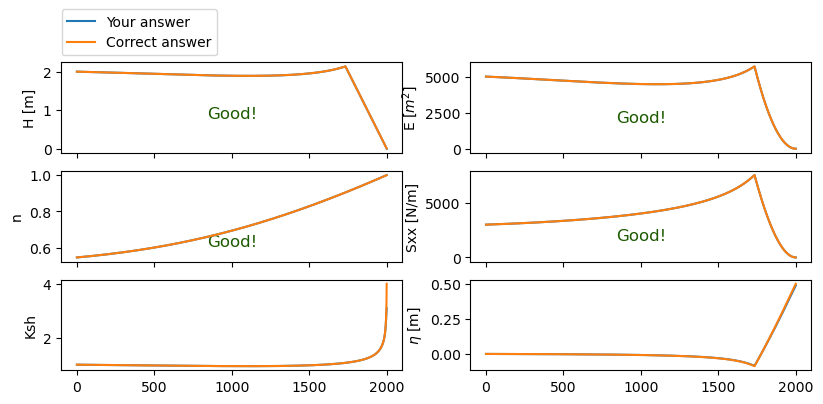

In [3]:
H0 = 2.0  # The offshore wave height [m]
T = 6  # The wave period [s]
h0 = 20  # The largest water depth
slope = 1 / 100  # The constant bed slope
rho = 1025  # The density of water [kg/m3]
x_range = np.arange(
    0, 2000 + 1, 1
)  # The cross-shore directed grid, the horizontal axis. (stepssize of 1 is required to function properly)

def wavelength(T, d):
    L = 9.81 * T**2 / (2 * np.pi)
    for i in range(1000):
        L = 9.81 * T**2 / ( 2 * np.pi) * np.tanh(2 * np.pi * d / L)
    return L

def intersection(A, B, x):
    assert A[0] < B[0]
    for a, b, x, i in zip(A, B, x, range(len(x))):
        if a >= b:
            break
    return x, i

def W3_normal_wave(x_range, H0, T, h0, slope):
    # The environmental conditions
    x = x_range  # the horizontal axis
    zbed = -h0 + slope * x  # bed elevation [m]
    h = -zbed  # still water depth [m]
    h[
        h < 0
    ] = 0  # no negative depths (A depth of 0 can cause warnings, these can be ignored to keep the code straightforward)

    # given conditions
    gamma = 0.8  # wave breaking ratio

    """Complete the code here"""
    L = wavelength(T, h)
    k = 2 * np.pi / L
    n = 0.5 * (1 + 2 * k * h / np.sinh(2 * k * h))

    c = L / T
    cg = n * c
    Ksh = np.sqrt(cg[0] / cg)
    
    Hsh = Ksh * H0
    Hbr = gamma * h

    loc, index = intersection(Hsh, Hbr, x)

    H = Hsh
    H[index:] = Hbr[index:]

    E = np.zeros(len(x))
    E = 0.5 * rho * 9.81 * (0.5 * H)**2

    Sxx = np.zeros(len(x))
    Sxx = (2 * n - 0.5) * E

    eta = np.zeros(len(x))

    for i in range(len(x) - 1):
        eta[i + 1] = eta[i] - (Sxx[i + 1] - Sxx[i]) / (rho * 9.81 * h[i])
    
    return H, n, Ksh, E, Sxx, eta


W3_plot_normal_incident_waves()

If you are not able to make the functions, you can set Load_answers = True (rather than False) to get the values for the wave height (H), for n, the shoaling parameter (Ksh), the wave energy (E), the radiant stress (Sxx), and the surface elevation (eta), with mean-sea-level at 0 m. The parameters list the outcomes of the functions

In [4]:
Load_answers = False

if Load_answers == True:
    angle = 0  # The offshore wave angle
    H0 = 1.5  # The offshore wave height [m]
    T = 6  # The wave period [s]
    h0 = 20  # The largest water depth
    slope = 1 / 30  # The constant bed slope
    H = [
        1.5,
        1.49975468745948,
        1.4995086464001774,
        1.499261878337649,
        1.4990143848294484,
        1.498766167475419,
        1.4985172279179815,
        1.4982675678424247,
        1.4980171889771967,
        1.497766093094194,
        1.497514282009055,
        1.497261757581446,
        1.4970085217153555,
        1.4967545763593837,
        1.496499923507032,
        1.4962445651969951,
        1.4959885035134517,
        1.4957317405863537,
        1.495474278591717,
        1.4952161197519125,
        1.494957266335957,
        1.4946977206598027,
        1.4944374850866269,
        1.4941765620271235,
        1.4939149539397911,
        1.4936526633312261,
        1.493389692756409,
        1.4931260448189956,
        1.4928617221716067,
        1.4925967275161178,
        1.4923310636039466,
        1.492064733236343,
        1.491797739264678,
        1.4915300845907318,
        1.491261772166984,
        1.4909928049968981,
        1.4907231861352133,
        1.4904529186882303,
        1.4901820058140973,
        1.4899104507231011,
        1.4896382566779522,
        1.4893654269940688,
        1.4890919650398684,
        1.48881787423705,
        1.4885431580608817,
        1.4882678200404862,
        1.487991863759126,
        1.4877152928544888,
        1.4874381110189718,
        1.4871603219999656,
        1.48688192960014,
        1.4866029376777277,
        1.4863233501468052,
        1.4860431709775794,
        1.485762404196669,
        1.485481053887388,
        1.4851991241900246,
        1.4849166193021293,
        1.4846335434787914,
        1.4843499010329209,
        1.4840656963355325,
        1.4837809338160253,
        1.4834956179624597,
        1.4832097533218416,
        1.4829233445004004,
        1.48263639616387,
        1.4823489130377647,
        1.4820608999076619,
        1.4817723616194773,
        1.4814833030797456,
        1.4811937292558959,
        1.4809036451765336,
        1.4806130559317126,
        1.480321966673216,
        1.4800303826148309,
        1.4797383090326273,
        1.479445751265232,
        1.4791527147141057,
        1.4788592048438194,
        1.4785652271823273,
        1.478270787321248,
        1.4779758909161327,
        1.4776805436867457,
        1.4773847514173344,
        1.47708851995691,
        1.4767918552195156,
        1.476494763184505,
        1.4761972498968152,
        1.4758993214672411,
        1.4756009840727091,
        1.4753022439565502,
        1.475003107428776,
        1.4747035808663513,
        1.4744036707134671,
        1.474103383481816,
        1.4738027257508666,
        1.4735017041681338,
        1.473200325449456,
        1.4728985963792687,
        1.4725965238108774,
        1.4722941146667328,
        1.4719913759387044,
        1.4716883146883566,
        1.471384938047221,
        1.4710812532170736,
        1.470777267470209,
        1.4704729881497158,
        1.4701684226697531,
        1.4698635785158256,
        1.4695584632450618,
        1.4692530844864897,
        1.4689474499413135,
        1.468641567383194,
        1.4683354446585242,
        1.4680290896867099,
        1.4677225104604485,
        1.4674157150460094,
        1.4671087115835146,
        1.4668015082872201,
        1.4664941134457978,
        1.4661865354226191,
        1.4658787826560382,
        1.465570863659677,
        1.4652627870227095,
        1.4649545614101513,
        1.4646461955631414,
        1.4643376982992378,
        1.4640290785127006,
        1.4637203451747867,
        1.4634115073340404,
        1.4631025741165866,
        1.4627935547264241,
        1.4624844584457235,
        1.4621752946351232,
        1.4618660727340265,
        1.4615568022609047,
        1.461247492813596,
        1.4609381540696098,
        1.4606287957864326,
        1.4603194278018325,
        1.460010060034171,
        1.459700702482709,
        1.459391365227922,
        1.4590820584318147,
        1.4587727923382354,
        1.4584635772731969,
        1.458154423645193,
        1.457845341945527,
        1.4575363427486336,
        1.4572274367124072,
        1.4569186345785323,
        1.4566099471728164,
        1.4563013854055258,
        1.4559929602717234,
        1.4556846828516097,
        1.4553765643108676,
        1.455068615901009,
        1.454760848959724,
        1.4544532749112347,
        1.4541459052666528,
        1.4538387516243376,
        1.4535318256702594,
        1.453225139178369,
        1.4529187040109641,
        1.4526125321190666,
        1.4523066355427987,
        1.4520010264117669,
        1.4516957169454443,
        1.4513907194535656,
        1.4510860463365167,
        1.4507817100857374,
        1.4504777232841217,
        1.4501740986064273,
        1.4498708488196868,
        1.4495679867836255,
        1.4492655254510844,
        1.4489634778684464,
        1.4486618571760692,
        1.4483606766087238,
        1.448059949496035,
        1.4477596892629339,
        1.4474599094301104,
        1.4471606236144727,
        1.4468618455296158,
        1.4465635889862916,
        1.4462658678928901,
        1.4459686962559213,
        1.4456720881805099,
        1.4453760578708923,
        1.4450806196309214,
        1.444785787864579,
        1.4444915770764954,
        1.4441980018724772,
        1.443905076960039,
        1.443612817148948,
        1.4433212373517705,
        1.4430303525844341,
        1.442740177966789,
        1.442450728723185,
        1.442162020183054,
        1.4418740677815016,
        1.4415868870599067,
        1.4413004936665317,
        1.441014903357142,
        1.4407301319956347,
        1.440446195554675,
        1.4401631101163455,
        1.4398808918728059,
        1.4395995571269604,
        1.4393191222931347,
        1.4390396038977715,
        1.4387610185801267,
        1.4384833830929842,
        1.4382067143033794,
        1.4379310291933347,
        1.4376563448606063,
        1.4373826785194475,
        1.4371100475013772,
        1.4368384692559661,
        1.4365679613516376,
        1.436298541476475,
        1.4360302274390513,
        1.4357630371692642,
        1.435496988719192,
        1.435232100263959,
        1.4349683901026205,
        1.434705876659058,
        1.4344445784828919,
        1.4341845142504122,
        1.43392570276552,
        1.4336681629606896,
        1.4334119138979469,
        1.4331569747698611,
        1.4329033649005587,
        1.432651103746752,
        1.4324002108987863,
        1.432150706081706,
        1.43190260915634,
        1.4316559401204028,
        1.431410719109622,
        1.4311669663988777,
        1.4309247024033687,
        1.4306839476797957,
        1.4304447229275687,
        1.4302070489900318,
        1.4299709468557142,
        1.429736437659602,
        1.4295035426844325,
        1.4292722833620146,
        1.4290426812745676,
        1.428814758156091,
        1.428588535893755,
        1.4283640365293169,
        1.4281412822605655,
        1.427920295442788,
        1.4277010985902707,
        1.4274837143778187,
        1.4272681656423107,
        1.4270544753842773,
        1.4268426667695144,
        1.42663276313072,
        1.426424787969167,
        1.4262187649564022,
        1.4260147179359823,
        1.425812670925237,
        1.425612648117069,
        1.4254146738817877,
        1.4252187727689711,
        1.4250249695093746,
        1.4248332890168638,
        1.4246437563903895,
        1.4244563969160016,
        1.4242712360688974,
        1.42408829951551,
        1.4239076131156374,
        1.4237292029246114,
        1.4235530951955073,
        1.4233793163813977,
        1.423207893137646,
        1.423038852324249,
        1.4228722210082188,
        1.4227080264660141,
        1.4225462961860182,
        1.4223870578710631,
        1.4222303394410025,
        1.4220761690353387,
        1.4219245750158915,
        1.4217755859695314,
        1.4216292307109535,
        1.4214855382855143,
        1.4213445379721175,
        1.4212062592861652,
        1.421070731982554,
        1.4209379860587417,
        1.4208080517578672,
        1.4206809595719356,
        1.4205567402450643,
        1.420435424776793,
        1.4203170444254583,
        1.4202016307116403,
        1.4200892154216702,
        1.4199798306112137,
        1.419873508608923,
        1.4197702820201612,
        1.4196701837308028,
        1.4195732469111104,
        1.419479505019687,
        1.4193889918075095,
        1.419301741322045,
        1.419217787911446,
        1.4191371662288341,
        1.4190599112366684,
        1.4189860582112042,
        1.41891564274704,
        1.4188487007617596,
        1.418785268500669,
        1.418725382541626,
        1.418669079799975,
        1.4186163975335793,
        1.4185673733479562,
        1.4185220452015221,
        1.4184804514109404,
        1.4184426306565854,
        1.418408621988117,
        1.4183784648301703,
        1.418352198988167,
        1.4183298646542446,
        1.418311502413313,
        1.418297153249235,
        1.4182868585511397,
        1.4182806601198659,
        1.4182786001745447,
        1.4182807213593205,
        1.4182870667502112,
        1.4182976798621212,
        1.4183126046559968,
        1.4183318855461389,
        1.418355567407672,
        1.4183836955841707,
        1.4184163158954548,
        1.4184534746455493,
        1.4184952186308166,
        1.4185415951482687,
        1.4185926520040562,
        1.4186484375221442,
        1.4187090005531773,
        1.418774390483541,
        1.4188446572446192,
        1.4189198513222578,
        1.4190000237664375,
        1.41908522620116,
        1.419175510834554,
        1.4192709304692093,
        1.4193715385127368,
        1.4194773889885708,
        1.4195885365470102,
        1.4197050364765098,
        1.4198269447152303,
        1.4199543178628433,
        1.4200872131926139,
        1.4202256886637508,
        1.4203698029340455,
        1.4205196153727988,
        1.4206751860740454,
        1.4208365758700867,
        1.4210038463453334,
        1.4211770598504756,
        1.4213562795169776,
        1.4215415692719187,
        1.4217329938531782,
        1.4219306188249816,
        1.4221345105938117,
        1.4223447364247035,
        1.422561364457919,
        1.4227844637260292,
        1.4230141041714024,
        1.423250356664112,
        1.4234932930202828,
        1.4237429860208777,
        1.4239995094309454,
        1.424262938019337,
        1.4245333475789064,
        1.4248108149472127,
        1.4250954180277278,
        1.4253872358115764,
        1.4256863483998177,
        1.4259928370262798,
        1.4263067840809767,
        1.4266282731341073,
        1.4269573889606688,
        1.4272942175656942,
        1.4276388462101348,
        1.4279913634374068,
        1.428351859100622,
        1.4287204243905225,
        1.4290971518641447,
        1.4294821354742253,
        1.4298754705993861,
        1.430277254075107,
        1.4306875842255207,
        1.4311065608960543,
        1.4315342854869382,
        1.431970860987618,
        1.4324163920120874,
        1.432870984835184,
        1.4333347474298677,
        1.433807789505518,
        1.4342902225472844,
        1.4347821598565191,
        1.4352837165923327,
        1.435795009814307,
        1.4363161585264024,
        1.4368472837221002,
        1.4373885084308213,
        1.437939957765664,
        1.4385017589725035,
        1.4390740414805034,
        1.4396569369540795,
        1.4402505793463771,
        1.4408551049543006,
        1.4414706524751604,
        1.4420973630649851,
        1.4427353803985656,
        1.4433848507312825,
        1.4440459229627851,
        1.4447187487025928,
        1.4454034823376745,
        1.4461002811020915,
        1.4468093051487696,
        1.447530717623482,
        1.4482646847411185,
        1.4490113758643368,
        1.4497709635846723,
        1.4505436238062008,
        1.45132953583186,
        1.4521288824525125,
        1.452941850038874,
        1.4537686286363969,
        1.4546094120632433,
        1.455464398011447,
        1.4563337881514062,
        1.4572177882398245,
        1.4581166082312427,
        1.459030462393308,
        1.459959569425916,
        1.4609041525843995,
        1.4618644398069143,
        1.4628406638461966,
        1.463833062405878,
        1.464841878281538,
        1.4658673595066924,
        1.4669097595039318,
        1.4679693372414153,
        1.4690463573949617,
        1.4701410905159595,
        1.4712538132053639,
        1.4723848082940338,
        1.4735343650296864,
        1.4747027792707668,
        1.4758903536875303,
        1.4770973979706654,
        1.478324229047795,
        1.4795711713082063,
        1.4808385568361957,
        1.4821267256534132,
        1.4834360259706296,
        1.4847668144493613,
        1.4861194564738185,
        1.4874943264336642,
        1.488891808018097,
        1.490312294521808,
        1.4917561891633753,
        1.4932239054167173,
        1.4947158673562349,
        1.4962325100163245,
        1.4977742797659839,
        1.4993416346992656,
        1.5009350450423855,
        1.5025549935783347,
        1.504201976089906,
        1.5058765018220845,
        1.507579093964822,
        1.509310290157276,
        1.511070643014654,
        1.512860720678884,
        1.514681107394401,
        1.5165324041104284,
        1.5184152291112147,
        1.5203302186757877,
        1.5222780277688803,
        1.524259330764802,
        1.526274822206146,
        1.5283252175993294,
        1.5304112542491364,
        1.532533692134544,
        1.534693314828296,
        1.5368909304628389,
        1.539127372745439,
        1.5414035020254857,
        1.543720206417202,
        1.5460784029812256,
        1.5484790389687664,
        1.5509230931323237,
        1.55341157710725,
        1.5559455368687576,
        1.5585260542693278,
        1.5611542486618561,
        1.563831278614281,
        1.5665583437219064,
        1.5693366865241,
        1.5721675945326186,
        1.5750524023793608,
        1.5779924940920282,
        1.580989305506848,
        1.5840443268283049,
        1.587159105346658,
        1.5903352483249515,
        1.593574426068256,
        1.5968783751889875,
        1.6002489020833868,
        1.603687886635621,
        1.6071972861674553,
        1.6107791396531077,
        1.6144355722207586,
        1.618168799964205,
        1.6219811350904187,
        1.6258749914312953,
        1.629852890350656,
        1.6339174670807033,
        1.6380714775255902,
        1.6423178055736598,
        1.6466594709642606,
        1.6510996377599034,
        1.6556416234800115,
        1.6602889089586617,
        1.6650451489956266,
        1.6699141838778802,
        1.6749000518575217,
        1.6533333333333333,
        1.626666666666668,
        1.6,
        1.573333333333335,
        1.5466666666666669,
        1.519999999999999,
        1.4933333333333338,
        1.466666666666666,
        1.4400000000000006,
        1.4133333333333327,
        1.3866666666666676,
        1.3599999999999994,
        1.3333333333333344,
        1.3066666666666664,
        1.2800000000000011,
        1.2533333333333332,
        1.2266666666666681,
        1.2000000000000002,
        1.173333333333335,
        1.146666666666667,
        1.119999999999999,
        1.0933333333333337,
        1.0666666666666658,
        1.0400000000000007,
        1.0133333333333325,
        0.9866666666666675,
        0.9599999999999995,
        0.9333333333333343,
        0.9066666666666663,
        0.8800000000000012,
        0.8533333333333332,
        0.826666666666668,
        0.8,
        0.7733333333333349,
        0.7466666666666669,
        0.7199999999999989,
        0.6933333333333338,
        0.6666666666666657,
        0.6400000000000006,
        0.6133333333333326,
        0.5866666666666674,
        0.5599999999999995,
        0.5333333333333343,
        0.5066666666666663,
        0.48000000000000115,
        0.45333333333333314,
        0.426666666666668,
        0.4,
        0.37333333333333485,
        0.3466666666666669,
        0.3199999999999989,
        0.2933333333333337,
        0.2666666666666657,
        0.24000000000000057,
        0.2133333333333326,
        0.18666666666666742,
        0.15999999999999945,
        0.13333333333333428,
        0.1066666666666663,
        0.08000000000000114,
        0.05333333333333315,
        0.026666666666667994,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
    ]
    n = [
        0.5475101544386716,
        0.5477686795063224,
        0.5480284157256252,
        0.5482893671038006,
        0.5485515376478207,
        0.5488149313642924,
        0.5490795522593392,
        0.5493454043384843,
        0.5496124916065303,
        0.5498808180674409,
        0.550150387724221,
        0.5504212045787964,
        0.5506932726318927,
        0.5509665958829145,
        0.5512411783298233,
        0.5515170239690151,
        0.5517941367951975,
        0.552072520801267,
        0.5523521799781848,
        0.5526331183148524,
        0.5529153397979875,
        0.5531988484119981,
        0.5534836481388578,
        0.5537697429579788,
        0.5540571368460864,
        0.5543458337770913,
        0.5546358377219629,
        0.5549271526486012,
        0.5552197825217084,
        0.5555137313026614,
        0.5558090029493817,
        0.5561056014162071,
        0.5564035306537614,
        0.5567027946088244,
        0.5570033972242018,
        0.5573053424385944,
        0.5576086341864669,
        0.5579132763979164,
        0.5582192729985412,
        0.5585266279093081,
        0.5588353450464201,
        0.5591454283211844,
        0.5594568816398786,
        0.5597697089036184,
        0.560083914008223,
        0.5603995008440824,
        0.5607164732960225,
        0.5610348352431715,
        0.5613545905588252,
        0.561675743110312,
        0.5619982967588585,
        0.5623222553594535,
        0.5626476227607138,
        0.5629744028047475,
        0.5633025993270194,
        0.5636322161562137,
        0.5639632571140998,
        0.5642957260153941,
        0.5646296266676252,
        0.5649649628709967,
        0.5653017384182509,
        0.5656399570945314,
        0.5659796226772477,
        0.5663207389359365,
        0.5666633096321264,
        0.5670073385191996,
        0.5673528293422555,
        0.5676997858379732,
        0.5680482117344745,
        0.5683981107511865,
        0.5687494865987046,
        0.5691023429786547,
        0.5694566835835565,
        0.5698125120966862,
        0.5701698321919387,
        0.5705286475336914,
        0.5708889617766659,
        0.5712507785657921,
        0.5716141015360701,
        0.5719789343124342,
        0.5723452805096152,
        0.5727131437320044,
        0.5730825275735164,
        0.5734534356174531,
        0.5738258714363668,
        0.5741998385919242,
        0.5745753406347707,
        0.5749523811043936,
        0.5753309635289875,
        0.5757110914253177,
        0.5760927682985858,
        0.576475997642294,
        0.5768607829381099,
        0.5772471276557334,
        0.5776350352527604,
        0.5780245091745494,
        0.5784155528540884,
        0.5788081697118606,
        0.5792023631557105,
        0.5795981365807127,
        0.5799954933690372,
        0.580394436889819,
        0.5807949704990245,
        0.5811970975393213,
        0.581600821339946,
        0.5820061452165735,
        0.5824130724711872,
        0.5828216063919484,
        0.5832317502530664,
        0.5836435073146701,
        0.5840568808226786,
        0.5844718740086734,
        0.5848884900897701,
        0.5853067322684914,
        0.5857266037326403,
        0.5861481076551734,
        0.5865712471940756,
        0.5869960254922343,
        0.5874224456773152,
        0.5878505108616374,
        0.5882802241420508,
        0.5887115885998123,
        0.5891446073004634,
        0.5895792832937088,
        0.5900156196132947,
        0.5904536192768894,
        0.5908932852859613,
        0.5913346206256618,
        0.5917776282647055,
        0.5922223111552526,
        0.5926686722327917,
        0.5931167144160236,
        0.5935664406067451,
        0.5940178536897343,
        0.5944709565326359,
        0.5949257519858488,
        0.5953822428824121,
        0.5958404320378938,
        0.5963003222502797,
        0.5967619162998632,
        0.5972252169491349,
        0.5976902269426756,
        0.5981569490070472,
        0.5986253858506863,
        0.5990955401637982,
        0.5995674146182516,
        0.6000410118674749,
        0.6005163345463523,
        0.6009933852711216,
        0.6014721666392728,
        0.6019526812294482,
        0.6024349316013424,
        0.6029189202956038,
        0.6034046498337375,
        0.6038921227180086,
        0.6043813414313469,
        0.6048723084372523,
        0.605365026179702,
        0.6058594970830579,
        0.6063557235519752,
        0.6068537079713129,
        0.6073534527060448,
        0.6078549601011709,
        0.6083582324816318,
        0.6088632721522224,
        0.6093700813975077,
        0.6098786624817397,
        0.6103890176487758,
        0.6109011491219969,
        0.6114150591042289,
        0.6119307497776638,
        0.6124482233037825,
        0.6129674818232793,
        0.6134885274559874,
        0.6140113623008049,
        0.6145359884356233,
        0.615062407917257,
        0.6155906227813731,
        0.6161206350424243,
        0.6166524466935817,
        0.6171860597066691,
        0.6177214760320997,
        0.6182586975988135,
        0.6187977263142151,
        0.6193385640641156,
        0.6198812127126723,
        0.6204256741023333,
        0.6209719500537814,
        0.6215200423658797,
        0.62206995281562,
        0.622621683158071,
        0.623175235126329,
        0.6237306104314694,
        0.6242878107625007,
        0.6248468377863194,
        0.6254076931476663,
        0.6259703784690847,
        0.6265348953508798,
        0.6271012453710806,
        0.6276694300854015,
        0.6282394510272084,
        0.6288113097074828,
        0.629385007614791,
        0.6299605462152527,
        0.6305379269525117,
        0.631117151247709,
        0.6316982204994568,
        0.6322811360838141,
        0.6328658993542646,
        0.6334525116416966,
        0.6340409742543821,
        0.6346312884779617,
        0.6352234555754275,
        0.6358174767871096,
        0.636413353330665,
        0.6370110864010654,
        0.63761067717059,
        0.6382121267888178,
        0.6388154363826235,
        0.6394206070561732,
        0.6400276398909235,
        0.6406365359456212,
        0.6412472962563063,
        0.641859921836315,
        0.6424744136762861,
        0.6430907727441677,
        0.6437089999852275,
        0.6443290963220636,
        0.644951062654617,
        0.6455748998601876,
        0.6462006087934501,
        0.6468281902864725,
        0.6474576451487373,
        0.648088974167163,
        0.648722178106129,
        0.6493572577075005,
        0.6499942136906582,
        0.6506330467525261,
        0.651273757567605,
        0.651916346788004,
        0.6525608150434784,
        0.6532071629414647,
        0.6538553910671212,
        0.6545054999833684,
        0.6551574902309323,
        0.655811362328389,
        0.6564671167722118,
        0.6571247540368195,
        0.6577842745746261,
        0.6584456788160947,
        0.6591089671697908,
        0.6597741400224385,
        0.6604411977389779,
        0.6611101406626262,
        0.6617809691149383,
        0.6624536833958705,
        0.663128283783846,
        0.6638047705358223,
        0.6644831438873601,
        0.6651634040526934,
        0.6658455512248035,
        0.6665295855754925,
        0.6672155072554599,
        0.6679033163943806,
        0.6685930131009852,
        0.6692845974631405,
        0.669978069547934,
        0.6706734294017588,
        0.6713706770503998,
        0.6720698124991226,
        0.6727708357327645,
        0.6734737467158254,
        0.6741785453925617,
        0.6748852316870824,
        0.6755938055034449,
        0.6763042667257544,
        0.6770166152182635,
        0.6777308508254747,
        0.6784469733722427,
        0.6791649826638806,
        0.6798848784862648,
        0.6806066606059447,
        0.6813303287702503,
        0.6820558827074046,
        0.6827833221266353,
        0.6835126467182879,
        0.6842438561539426,
        0.6849769500865286,
        0.6857119281504439,
        0.6864487899616731,
        0.6871875351179092,
        0.6879281631986736,
        0.6886706737654403,
        0.6894150663617601,
        0.6901613405133851,
        0.6909094957283957,
        0.691659531497328,
        0.6924114472933022,
        0.6931652425721532,
        0.69392091677256,
        0.694678469316178,
        0.6954378996077716,
        0.6961992070353474,
        0.6969623909702884,
        0.6977274507674902,
        0.6984943857654948,
        0.6992631952866295,
        0.700033878637143,
        0.7008064351073434,
        0.7015808639717372,
        0.7023571644891684,
        0.7031353359029581,
        0.7039153774410444,
        0.704697288316124,
        0.7054810677257921,
        0.7062667148526842,
        0.7070542288646181,
        0.7078436089147352,
        0.7086348541416427,
        0.7094279636695565,
        0.7102229366084425,
        0.7110197720541599,
        0.7118184690886031,
        0.7126190267798442,
        0.7134214441822752,
        0.7142257203367496,
        0.7150318542707251,
        0.7158398449984045,
        0.716649691520877,
        0.7174613928262592,
        0.7182749478898356,
        0.7190903556741981,
        0.7199076151293855,
        0.7207267251930225,
        0.7215476847904571,
        0.7223704928348986,
        0.7231951482275538,
        0.7240216498577623,
        0.724849996603132,
        0.725680187329672,
        0.7265122208919257,
        0.7273460961331025,
        0.7281818118852084,
        0.7290193669691744,
        0.7298587601949849,
        0.7306999903618048,
        0.7315430562581038,
        0.7323879566617801,
        0.7332346903402829,
        0.7340832560507329,
        0.7349336525400407,
        0.7357858785450241,
        0.7366399327925233,
        0.7374958139995142,
        0.7383535208732203,
        0.7392130521112212,
        0.7400744064015613,
        0.7409375824228535,
        0.7418025788443837,
        0.7426693943262104,
        0.7435380275192639,
        0.7444084770654423,
        0.7452807415977047,
        0.7461548197401628,
        0.7470307101081688,
        0.747908411308402,
        0.7487879219389513,
        0.749669240589396,
        0.7505523658408835,
        0.7514372962662037,
        0.7523240304298602,
        0.7532125668881404,
        0.7541029041891799,
        0.7549950408730255,
        0.7558889754716946,
        0.7567847065092309,
        0.757682232501758,
        0.7585815519575279,
        0.7594826633769673,
        0.7603855652527209,
        0.7612902560696895,
        0.7621967343050657,
        0.7631049984283663,
        0.7640150469014602,
        0.7649268781785924,
        0.7658404907064058,
        0.7667558829239574,
        0.7676730532627314,
        0.7685920001466491,
        0.7695127219920734,
        0.7704352172078109,
        0.7713594841951086,
        0.7722855213476473,
        0.7732133270515315,
        0.774142899685274,
        0.7750742376197768,
        0.7760073392183087,
        0.7769422028364772,
        0.777878826822197,
        0.7788172095156554,
        0.7797573492492709,
        0.7806992443476499,
        0.7816428931275374,
        0.7825882938977659,
        0.7835354449591958,
        0.7844843446046563,
        0.7854349911188783,
        0.7863873827784249,
        0.7873415178516174,
        0.7882973945984566,
        0.789255011270539,
        0.7902143661109711,
        0.7911754573542764,
        0.7921382832263015,
        0.7931028419441144,
        0.7940691317159014,
        0.7950371507408585,
        0.7960068972090788,
        0.7969783693014361,
        0.7979515651894635,
        0.79892648303523,
        0.7999031209912102,
        0.8008814772001525,
        0.8018615497949415,
        0.8028433368984593,
        0.8038268366234387,
        0.804812047072317,
        0.8057989663370835,
        0.8067875924991245,
        0.8077779236290631,
        0.8087699577865992,
        0.8097636930203416,
        0.8107591273676398,
        0.811756258854412,
        0.8127550854949694,
        0.813755605291838,
        0.8147578162355769,
        0.8157617163045952,
        0.8167673034649642,
        0.8177745756702292,
        0.8187835308612165,
        0.8197941669658404,
        0.8208064818989066,
        0.8218204735619135,
        0.8228361398428523,
        0.8238534786160057,
        0.8248724877417428,
        0.8258931650663153,
        0.826915508421651,
        0.8279395156251457,
        0.828965184479455,
        0.8299925127722858,
        0.8310214982761859,
        0.8320521387483331,
        0.8330844319303261,
        0.8341183755479735,
        0.8351539673110827,
        0.8361912049132514,
        0.8372300860316573,
        0.8382706083268499,
        0.8393127694425435,
        0.8403565670054098,
        0.8414019986248754,
        0.8424490618929166,
        0.8434977543838602,
        0.8445480736541839,
        0.845600017242321,
        0.8466535826684665,
        0.8477087674343866,
        0.848765569023233,
        0.849823984899358,
        0.8508840125081361,
        0.8519456492757885,
        0.8530088926092123,
        0.854073739895814,
        0.8551401885033498,
        0.856208235779769,
        0.8572778790530646,
        0.8583491156311303,
        0.8594219428016219,
        0.8604963578318281,
        0.8615723579685463,
        0.8626499404379666,
        0.8637291024455639,
        0.8648098411759972,
        0.8658921537930189,
        0.8669760374393908,
        0.8680614892368121,
        0.8691485062858547,
        0.8702370856659094,
        0.8713272244351429,
        0.8724189196304654,
        0.8735121682675082,
        0.8746069673406158,
        0.8757033138228472,
        0.8768012046659905,
        0.8779006368005914,
        0.8790016071359947,
        0.8801041125603974,
        0.8812081499409201,
        0.8823137161236891,
        0.8834208079339361,
        0.8845294221761121,
        0.8856395556340183,
        0.8867512050709534,
        0.8878643672298765,
        0.8889790388335896,
        0.8900952165849363,
        0.8912128971670193,
        0.8923320772434382,
        0.8934527534585439,
        0.8945749224377157,
        0.8956985807876575,
        0.8968237250967142,
        0.8979503519352109,
        0.8990784578558138,
        0.900208039393912,
        0.9013390930680252,
        0.9024716153802311,
        0.9036056028166207,
        0.904741051847775,
        0.9058779589292685,
        0.9070163205021983,
        0.9081561329937389,
        0.9092973928177231,
        0.9104400963752521,
        0.9115842400553311,
        0.9127298202355354,
        0.9138768332827037,
        0.9150252755536619,
        0.9161751433959773,
        0.9173264331487416,
        0.9184791411433881,
        0.9196332637045377,
        0.9207887971508786,
        0.9219457377960792,
        0.9231040819497347,
        0.9242638259183459,
        0.9254249660063354,
        0.9265874985170968,
        0.9277514197540808,
        0.9289167260219182,
        0.9300834136275786,
        0.9312514788815678,
        0.9324209180991623,
        0.9335917276016854,
        0.9347639037178179,
        0.9359374427849537,
        0.9371123411505928,
        0.9382885951737772,
        0.939466201226567,
        0.9406451556955613,
        0.9418254549834595,
        0.943007095510668,
        0.9441900737169499,
        0.9453743860631212,
        0.94656002903279,
        0.9477469991341445,
        0.9489352929017851,
        0.9501249068986054,
        0.9513158377177205,
        0.9525080819844436,
        0.953701636358312,
        0.9548964975351626,
        0.9560926622492582,
        0.9572901272754631,
        0.9584888894314729,
        0.9596889455800933,
        0.9608902926315745,
        0.9620929275459968,
        0.9632968473357115,
        0.9645020490678358,
        0.9657085298668024,
        0.966916286916967,
        0.9681253174652682,
        0.9693356188239499,
        0.9705471883733356,
        0.9717600235646657,
        0.9729741219229904,
        0.9741894810501244,
        0.9754060986276593,
        0.9766239724200398,
        0.9778431002776985,
        0.979063480140254,
        0.9802851100397709,
        0.9815079881040849,
        0.9827321125601879,
        0.9839574817376826,
        0.9851840940722978,
        0.9864119481094717,
        0.9876410425080019,
        0.98887137604376,
        0.9901029476134771,
        0.9913357562385949,
        0.9925698010691878,
        0.9938050813879523,
        0.9950415966142694,
        0.9962793463083348,
        0.9975183301753646,
        0.9987585480698684,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
    ]
    Ksh = [
        1.0,
        0.9998364583063201,
        0.9996724309334517,
        0.9995079188917659,
        0.9993429232196323,
        0.9991774449836126,
        0.9990114852786544,
        0.9988450452282831,
        0.9986781259847978,
        0.9985107287294628,
        0.9983428546727033,
        0.9981745050542973,
        0.9980056811435704,
        0.9978363842395891,
        0.9976666156713546,
        0.9974963767979967,
        0.9973256690089678,
        0.9971544937242358,
        0.9969828523944779,
        0.996810746501275,
        0.9966381775573047,
        0.9964651471065351,
        0.9962916567244179,
        0.9961177080180823,
        0.9959433026265274,
        0.9957684422208174,
        0.9955931285042726,
        0.9954173632126637,
        0.9952411481144045,
        0.9950644850107453,
        0.9948873757359644,
        0.994709822157562,
        0.994531826176452,
        0.9943533897271546,
        0.9941745147779893,
        0.9939952033312655,
        0.9938154574234755,
        0.9936352791254868,
        0.9934546705427315,
        0.9932736338154008,
        0.9930921711186348,
        0.9929102846627125,
        0.9927279766932456,
        0.9925452494913666,
        0.9923621053739211,
        0.9921785466936575,
        0.9919945758394173,
        0.9918101952363259,
        0.9916254073459811,
        0.9914402146666438,
        0.9912546197334268,
        0.9910686251184851,
        0.9908822334312034,
        0.9906954473183863,
        0.990508269464446,
        0.990320702591592,
        0.9901327494600165,
        0.9899444128680862,
        0.9897556956525275,
        0.9895666006886139,
        0.9893771308903551,
        0.9891872892106836,
        0.9889970786416398,
        0.988806502214561,
        0.988615563000267,
        0.9884242641092467,
        0.9882326086918432,
        0.9880405999384412,
        0.9878482410796515,
        0.9876555353864971,
        0.9874624861705973,
        0.9872690967843558,
        0.9870753706211417,
        0.9868813111154773,
        0.9866869217432206,
        0.9864922060217516,
        0.9862971675101546,
        0.9861018098094038,
        0.9859061365625462,
        0.9857101514548849,
        0.9855138582141654,
        0.9853172606107552,
        0.9851203624578304,
        0.9849231676115563,
        0.9847256799712732,
        0.984527903479677,
        0.9843298421230032,
        0.9841314999312102,
        0.9839328809781608,
        0.9837339893818061,
        0.9835348293043668,
        0.9833354049525173,
        0.9831357205775675,
        0.9829357804756447,
        0.9827355889878774,
        0.9825351505005777,
        0.9823344694454225,
        0.9821335502996372,
        0.9819323975861791,
        0.9817310158739182,
        0.9815294097778218,
        0.9813275839591363,
        0.9811255431255711,
        0.9809232920314807,
        0.9807208354780491,
        0.9805181783134728,
        0.9803153254331439,
        0.9801122817798353,
        0.9799090523438838,
        0.9797056421633745,
        0.9795020563243265,
        0.9792982999608757,
        0.9790943782554627,
        0.9788902964390161,
        0.9786860597911399,
        0.978481673640299,
        0.9782771433640063,
        0.9780724743890098,
        0.9778676721914801,
        0.9776627422971985,
        0.977457690281746,
        0.9772525217706921,
        0.9770472424397846,
        0.9768418580151397,
        0.9766363742734342,
        0.9764307970420942,
        0.9762251321994918,
        0.9760193856751337,
        0.9758135634498578,
        0.9756076715560269,
        0.9754017160777244,
        0.9751957031509494,
        0.9749896389638157,
        0.9747835297567488,
        0.9745773818226844,
        0.9743712015072697,
        0.9741649952090639,
        0.9739587693797399,
        0.9737525305242883,
        0.9735462852012217,
        0.9733400400227806,
        0.9731338016551393,
        0.9729275768186146,
        0.9727213722878765,
        0.972515194892157,
        0.9723090515154645,
        0.9721029490967954,
        0.9718968946303513,
        0.9716908951657557,
        0.9714849578082714,
        0.9712790897190215,
        0.9710732981152109,
        0.9708675902703505,
        0.9706619735144822,
        0.9704564552344064,
        0.9702510428739117,
        0.9700457439340061,
        0.9698405659731493,
        0.9696355166074897,
        0.9694306035111019,
        0.969225834416225,
        0.9690212171135063,
        0.968816759452246,
        0.9686124693406428,
        0.9684083547460444,
        0.9682044236951991,
        0.9680006842745112,
        0.9677971446302962,
        0.9675938129690437,
        0.9673906975576778,
        0.967187806723825,
        0.9669851488560812,
        0.9667827324042849,
        0.9665805658797912,
        0.9663786578557503,
        0.9661770169673896,
        0.9659756519122976,
        0.9657745714507129,
        0.9655737844058159,
        0.9653732996640232,
        0.9651731261752892,
        0.964973272953407,
        0.9647737490763152,
        0.9645745636864105,
        0.964375725990861,
        0.9641772452619267,
        0.9639791308372808,
        0.9637813921203399,
        0.9635840385805948,
        0.9633870797539476,
        0.9631905252430526,
        0.9629943847176636,
        0.9627986679149848,
        0.962603384640026,
        0.9624085447659653,
        0.9622141582345137,
        0.9620202350562894,
        0.9618267853111926,
        0.9616338191487899,
        0.9614413467887026,
        0.9612493785210011,
        0.9610579247066044,
        0.9608669957776879,
        0.9606766022380947,
        0.9604867546637565,
        0.9602974637031166,
        0.9601087400775636,
        0.9599205945818706,
        0.9597330380846403,
        0.9595460815287565,
        0.9593597359318476,
        0.9591740123867512,
        0.9589889220619895,
        0.958804476202253,
        0.9586206861288897,
        0.9584375632404043,
        0.958255119012965,
        0.9580733650009181,
        0.9578923128373108,
        0.957711974234425,
        0.9575323609843167,
        0.9573534849593676,
        0.9571753581128428,
        0.9569979924794613,
        0.9568214001759726,
        0.956645593401747,
        0.9564705844393719,
        0.9562963856552613,
        0.9561230095002748,
        0.9559504685103466,
        0.9557787753071264,
        0.9556079425986312,
        0.9554379831799074,
        0.9552689099337058,
        0.955100735831168,
        0.9549334739325243,
        0.954767137387804,
        0.95460173943756,
        0.9544372934136018,
        0.954273812739748,
        0.9541113109325852,
        0.9539498016022457,
        0.9537892984531972,
        0.9536298152850459,
        0.9534713659933546,
        0.9533139645704761,
        0.9531576251064013,
        0.9530023617896216,
        0.9528481889080097,
        0.9526951208497118,
        0.9525431721040607,
        0.9523923572625033,
        0.9522426910195446,
        0.9520941881737103,
        0.9519468636285254,
        0.9518007323935138,
        0.9516558095852126,
        0.9515121104282072,
        0.9513696502561849,
        0.9512284445130096,
        0.9510885087538135,
        0.9509498586461113,
        0.9508125099709348,
        0.9506764786239882,
        0.9505417806168247,
        0.950408432078046,
        0.950276449254525,
        0.9501458485126475,
        0.950016646339583,
        0.9498888593445758,
        0.9497625042602597,
        0.949637597944001,
        0.9495141573792649,
        0.9493921996770067,
        0.9492717420770916,
        0.9491528019497409,
        0.9490353967970049,
        0.9489195442542651,
        0.948805262091764,
        0.948692568216166,
        0.9485814806721459,
        0.9484720176440095,
        0.9483641974573455,
        0.9482580385807088,
        0.948153559627335,
        0.9480507793568924,
        0.947949716677261,
        0.9478503906463542,
        0.947752820473969,
        0.9476570255236761,
        0.947563025314745,
        0.9474708395241102,
        0.9473804879883694,
        0.9472919907058277,
        0.9472053678385781,
        0.9471206397146238,
        0.9470378268300429,
        0.9469569498511953,
        0.9468780296169722,
        0.9468010871410935,
        0.9467261436144467,
        0.9466532204074758,
        0.9465823390726152,
        0.9465135213467741,
        0.9464467891538685,
        0.9463821646074069,
        0.9463196700131247,
        0.946259327871673,
        0.9462011608813633,
        0.946145191940964,
        0.9460914441525561,
        0.9460399408244456,
        0.9459907054741361,
        0.94594376183136,
        0.9458991338411731,
        0.9458568456671126,
        0.9458169216944173,
        0.9457793865333167,
        0.9457442650223862,
        0.9457115822319708,
        0.9456813634676814,
        0.9456536342739602,
        0.9456284204377235,
        0.9456057479920779,
        0.9455856432201135,
        0.9455681326587779,
        0.9455532431028297,
        0.9455410016088753,
        0.9455314354994899,
        0.9455245723674265,
        0.9455204400799105,
        0.9455190667830298,
        0.9455204809062137,
        0.9455247111668075,
        0.9455317865747475,
        0.9455417364373312,
        0.9455545903640926,
        0.9455703782717814,
        0.9455891303894471,
        0.9456108772636366,
        0.9456356497636995,
        0.9456634790872112,
        0.9456943967655125,
        0.9457284346693707,
        0.9457656250147628,
        0.9458060003687849,
        0.945849593655694,
        0.9458964381630794,
        0.945946567548172,
        0.9460000158442917,
        0.94605681746744,
        0.946117007223036,
        0.9461806203128061,
        0.9462476923418245,
        0.9463182593257139,
        0.9463923576980068,
        0.9464700243176731,
        0.9465512964768202,
        0.9466362119085622,
        0.9467248087950759,
        0.9468171257758339,
        0.9469132019560303,
        0.9470130769151992,
        0.9471167907160303,
        0.9472243839133911,
        0.9473358975635556,
        0.9474513732336504,
        0.9475708530113184,
        0.9476943795146124,
        0.9478219959021188,
        0.947953745883321,
        0.9480896737292078,
        0.9482298242831356,
        0.948374242971946,
        0.9485229758173528,
        0.9486760694476016,
        0.9488335711094079,
        0.9489955286801885,
        0.949161990680585,
        0.949333006287297,
        0.9495086253462246,
        0.9496888983859376,
        0.9498738766314752,
        0.9500636120184851,
        0.9502581572077177,
        0.9504575655998784,
        0.9506618913508532,
        0.9508711893873177,
        0.9510855154227382,
        0.9513049259737792,
        0.9515294783771295,
        0.9517592308067566,
        0.9519942422916046,
        0.952234572733748,
        0.9524802829270149,
        0.9527314345760964,
        0.9529880903161503,
        0.9532503137329241,
        0.9535181693834047,
        0.9537917228170139,
        0.9540710405973695,
        0.9543561903246254,
        0.954647240658412,
        0.9549442613413915,
        0.955247323223456,
        0.9555564982865784,
        0.9558718596703453,
        0.9561934816981896,
        0.9565214399043461,
        0.956855811061555,
        0.957196673209538,
        0.9575441056842683,
        0.9578981891480668,
        0.9582590056205476,
        0.9586266385104426,
        0.9590011726483357,
        0.9593826943203356,
        0.9597712913027197,
        0.9601670528975847,
        0.9605700699695338,
        0.9609804349834402,
        0.9613982420433234,
        0.9618235869323771,
        0.9622565671541884,
        0.9626972819751901,
        0.9631458324683951,
        0.9636023215584496,
        0.964066854068061,
        0.9645395367658464,
        0.9650204784156546,
        0.9655097898274123,
        0.9660075839095579,
        0.9665139757231148,
        0.9670290825374672,
        0.9675530238879066,
        0.9680859216350084,
        0.9686279000259159,
        0.9691790857575979,
        0.9697396080421622,
        0.970309598674298,
        0.9708891921009375,
        0.9714785254932163,
        0.9720777388208285,
        0.9726869749288719,
        0.9733063796172773,
        0.973936101722933,
        0.9745762932046095,
        0.9752271092307977,
        0.9758887082705854,
        0.976561252187692,
        0.9772449063377949,
        0.9779398396692879,
        0.9786462248276102,
        0.9793642382633078,
        0.9800940603439731,
        0.9808358754702425,
        0.9815898721960226,
        0.9823562433531243,
        0.9831351861805112,
        0.9839269024583536,
        0.9847315986471102,
        0.9855494860318633,
        0.9863807808721374,
        0.9872257045574638,
        0.9880844837689421,
        0.9889573506470865,
        0.9898445429662409,
        0.990746304315879,
        0.9916628842891094,
        0.9925945386787314,
        0.9935415296812052,
        0.9945041261089169,
        0.9954826036111449,
        0.9964772449041566,
        0.997488340010883,
        0.9985161865106559,
        0.9995610897995104,
        1.0006233633615904,
        1.001703329052223,
        1.0028013173932706,
        1.0039176678813897,
        1.0050527293098812,
        1.0062068601048506,
        1.007380428676436,
        1.0085738137859226,
        1.0097874049296007,
        1.0110216027402856,
        1.0122768194074765,
        1.0135534791171918,
        1.0148520185125869,
        1.0161728871765348,
        1.0175165481374306,
        1.0188834783995528,
        1.0202741694994242,
        1.021689128089696,
        1.0231288765521973,
        1.0245939536418927,
        1.026084915163626,
        1.0276023346836571,
        1.0291468042781347,
        1.030718935320817,
        1.0323193593125108,
        1.0339487287548825,
        1.0356077180715,
        1.0372970245791717,
        1.0390173695128853,
        1.0407694991079042,
        1.042554185742854,
        1.0443722291479376,
        1.0462244576827333,
        1.0481117296884124,
        1.050034934919574,
        1.0519949960613522,
        1.0539928703378987,
        1.05602955121887,
        1.0581060702311054,
        1.060223498883301,
        1.0623829507121707,
        1.064585583459325,
        1.0668326013889244,
        1.0691252577570807,
        1.07146485744497,
        1.0738527597687384,
        1.0762903814805058,
        1.0787791999761367,
        1.0813207567269458,
        1.0839166609541968,
        1.086568593567104,
        1.0892783113871356,
        1.0920476516837267,
        1.0948785370491065,
        1.0977729806428405,
        1.1007330918399356,
        1.1037610823200077,
        1.1068592726391078,
        1.1100300993304177,
        1.1132761225852534,
        1.116600034571681,
        1.1200046684547407,
        1.1234930081898282,
        1.127068199169397,
        1.1307335598129225,
        1.1344925942012904,
        1.1383490058695207,
        1.1423067128864477,
        1.1463698643668083,
        1.150542858580612,
        1.1548303628470948,
        1.1592373354264944,
        1.163769049653036,
        1.1684311205875473,
        1.1732295345090917,
        1.178170681612876,
        1.1832613923379944,
        1.1885089778148212,
        1.1939212750002413,
        1.1995066971617905,
        1.205274290482437,
        1.211233797689858,
        1.2173957297726428,
        1.2237714470368053,
        1.230373250986996,
        1.2372144887975642,
        1.2443096724813119,
        1.2516746152844023,
        1.2593265883545364,
        1.2672845013729197,
        1.275569111642978,
        1.2842032671360555,
        1.2932121902665825,
        1.3026238107874726,
        1.3124691582696266,
        1.3227828273060638,
        1.3336035320652186,
        1.344974771393156,
        1.3569456317287585,
        1.3695717632153712,
        1.3829165753811494,
        1.397052713806204,
        1.412063900056013,
        1.4280472464814338,
        1.4451161993118027,
        1.4634043241051027,
        1.4830702371026696,
        1.5043041206943708,
        1.52733646827659,
        1.5524500300005,
        1.579996458899923,
        1.6104200379819278,
        1.6442923912975227,
        1.6823648201302432,
        1.7256500650502318,
        1.7755555671706087,
        1.8341121507602645,
        1.904392439100997,
        1.9913420123155177,
        2.103621941796159,
        2.25837962936456,
        2.4969771971352666,
        2.966655615511504,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
    ]
    E = [
        2828.0390625,
        2827.1141335422603,
        2826.1866097210836,
        2825.2564981001656,
        2824.323805901686,
        2823.388540507255,
        2822.4507094588366,
        2821.510320459678,
        2820.5673813752446,
        2819.621900234139,
        2818.6738852290405,
        2817.7233447176072,
        2816.7702872234154,
        2815.8147214368682,
        2814.8566562161122,
        2813.896100587957,
        2812.9330637487838,
        2811.9675550654556,
        2810.999584076221,
        2810.029160491622,
        2809.0562941954004,
        2808.0809952453924,
        2807.103273874424,
        2806.1231404912105,
        2805.1406056812443,
        2804.1556802076907,
        2803.168375012267,
        2802.178701216128,
        2801.1866701207528,
        2800.1922932088173,
        2799.1955821450706,
        2798.1965487772068,
        2797.1952051367366,
        2796.191563439853,
        2795.185636088298,
        2794.1774356702135,
        2793.166974961013,
        2792.154266924224,
        2791.139324712343,
        2790.1221616676876,
        2789.1027913232433,
        2788.0812274034897,
        2787.057483825263,
        2786.0315746985716,
        2785.003514327441,
        2783.9733172107367,
        2782.9409980429955,
        2781.906571715243,
        2780.8700533158176,
        2779.831458131182,
        2778.7908016467413,
        2777.748099547655,
        2776.7033677196328,
        2775.65662224975,
        2774.6078794272407,
        2773.5571557443027,
        2772.504467896875,
        2771.44983278545,
        2770.3932675158453,
        2769.3347893999876,
        2768.2744159567055,
        2767.2121649125033,
        2766.1480542023232,
        2765.0821019703335,
        2764.014326570685,
        2762.9447465682906,
        2761.8733807395697,
        2760.8002480732216,
        2759.7253677709764,
        2758.648759248348,
        2757.570442135383,
        2756.49043627742,
        2755.408761735818,
        2754.3254387887087,
        2753.2404879317323,
        2752.1539298787784,
        2751.065785562715,
        2749.9760761361226,
        2748.8848229720247,
        2747.7920476646036,
        2746.6977720299487,
        2745.6020181067506,
        2744.504808157041,
        2743.406164666893,
        2742.3061103471578,
        2741.204668134156,
        2740.1018611904024,
        2738.9977129053145,
        2737.8922468959145,
        2736.7854870075407,
        2735.6774573145444,
        2734.5681821210037,
        2733.4576859614185,
        2732.3459936014056,
        2731.2331300384085,
        2730.119120502392,
        2729.00399045653,
        2727.8877655979118,
        2726.7704718582354,
        2725.652135404497,
        2724.5327826396915,
        2723.4124402035,
        2722.2911349729893,
        2721.1688940632994,
        2720.0457448283396,
        2718.9217148614835,
        2717.7968319962565,
        2716.6711243070367,
        2715.5446201097443,
        2714.417347962542,
        2713.2893366665285,
        2712.1606152664317,
        2711.0312130513157,
        2709.9011595552747,
        2708.7704845581366,
        2707.639218086165,
        2706.5073904127653,
        2705.375032059192,
        2704.2421737952586,
        2703.1088466400465,
        2701.9750818626244,
        2700.8409109827635,
        2699.706365771658,
        2698.5714782526484,
        2697.436280701955,
        2696.3008056493936,
        2695.165085879135,
        2694.0291544304187,
        2692.8930445983137,
        2691.756789934463,
        2690.6204242478348,
        2689.4839816054778,
        2688.3474963332937,
        2687.2110030168033,
        2686.0745365019134,
        2684.938131895713,
        2683.801824567248,
        2682.665650148324,
        2681.529644534305,
        2680.3938438849214,
        2679.258284625092,
        2678.1230034457394,
        2676.988037304626,
        2675.8534234271992,
        2674.7191993074357,
        2673.5854027087066,
        2672.452071664629,
        2671.3192444799674,
        2670.1869597315067,
        2669.0552562689513,
        2667.9241732158393,
        2666.793749970457,
        2665.6640262067745,
        2664.5350418753874,
        2663.4068372044712,
        2662.279452700753,
        2661.1529291504917,
        2660.0273076204644,
        2658.9026294589853,
        2657.778936296924,
        2656.6562700487384,
        2655.534672913529,
        2654.414187376111,
        2653.2948562080855,
        2652.1767224689497,
        2651.0598295072045,
        2649.9442209614954,
        2648.8299407617505,
        2647.717033130362,
        2646.6055425833615,
        2645.4955139316385,
        2644.3869922821523,
        2643.2800230391877,
        2642.174651905612,
        2641.070924884168,
        2639.9688882787814,
        2638.8685886958874,
        2637.7700730457896,
        2636.673388544031,
        2635.57858271279,
        2634.4857033823173,
        2633.394798692374,
        2632.3059170937054,
        2631.2191073495483,
        2630.1344185371504,
        2629.051900049333,
        2627.9716015960607,
        2626.8935732060654,
        2625.8178652284787,
        2624.7445283344996,
        2623.673613519097,
        2622.605172102743,
        2621.5392557331743,
        2620.4759163871854,
        2619.4152063724623,
        2618.357178329437,
        2617.301885233198,
        2616.2493803954103,
        2615.199717466293,
        2614.152950436626,
        2613.10913363979,
        2612.0683217538535,
        2611.030569803691,
        2609.9959331631517,
        2608.9644675572636,
        2607.936229064472,
        2606.9112741189356,
        2605.8896595128613,
        2604.871442398879,
        2603.8566802924593,
        2602.8454310743987,
        2601.837752993325,
        2600.833704668267,
        2599.8333450912746,
        2598.8367336300803,
        2597.843930030819,
        2596.854994420808,
        2595.86998731136,
        2594.8889696006654,
        2593.9120025767384,
        2592.939147920396,
        2591.9704677083237,
        2591.0060244161764,
        2590.045880921755,
        2589.0901005082374,
        2588.138746867483,
        2587.191884103386,
        2586.249576735305,
        2585.311889701562,
        2584.378888363,
        2583.4506385066184,
        2582.527206349279,
        2581.6086585414773,
        2580.695062171201,
        2579.786484767851,
        2578.882994306248,
        2577.9846592107115,
        2577.091548359231,
        2576.2037310876967,
        2575.3212771942435,
        2574.4442569436524,
        2573.5727410718537,
        2572.7068007905195,
        2571.8465077917435,
        2570.991934252805,
        2570.14315284104,
        2569.300236718803,
        2568.4632595485214,
        2567.6322954978677,
        2566.8074192450026,
        2565.9887059839534,
        2565.176231430079,
        2564.3700718256523,
        2563.5703039455466,
        2562.7770051030357,
        2561.99025315572,
        2561.210126511551,
        2560.4367041349883,
        2559.6700655532704,
        2558.9102908628242,
        2558.157460735779,
        2557.4116564266337,
        2556.672959779036,
        2555.941453232711,
        2555.2172198305157,
        2554.5003432256453,
        2553.790907688978,
        2553.0889981165506,
        2552.39470003722,
        2551.7080996204368,
        2551.029283684196,
        2550.3583397031466,
        2549.695355816856,
        2549.0404208382383,
        2548.3936242621585,
        2547.7550562742035,
        2547.12480775963,
        2546.5029703124947,
        2545.889636244957,
        2545.2848985967876,
        2544.688851145046,
        2544.101588413968,
        2543.523205685047,
        2542.9537990073172,
        2542.3934652078447,
        2541.8423019024362,
        2541.3004075065464,
        2540.767881246438,
        2540.2448231705284,
        2539.7313341609984,
        2539.227515945612,
        2538.7334711098106,
        2538.2493031090003,
        2537.7751162811423,
        2537.311015859568,
        2536.857107986068,
        2536.4134997242445,
        2535.98029907314,
        2535.557614981133,
        2535.1455573601465,
        2534.7442371001152,
        2534.353766083774,
        2533.974257201745,
        2533.6058243679286,
        2533.248582535218,
        2532.902647711547,
        2532.5681369762556,
        2532.245168496805,
        2531.9338615458387,
        2531.6343365186,
        2531.3467149507073,
        2531.0711195363097,
        2530.807674146617,
        2530.556503848817,
        2530.317734925397,
        2530.091494893873,
        2529.877912526916,
        2529.6771178729377,
        2529.4892422770813,
        2529.314418402673,
        2529.1527802531277,
        2529.004463194317,
        2528.869603977422,
        2528.7483407622726,
        2528.640813141181,
        2528.5471621632973,
        2528.4675303594845,
        2528.4020617677306,
        2528.350901959111,
        2528.3141980643154,
        2528.2920988007495,
        2528.284754500226,
        2528.2923171372704,
        2528.3149403580264,
        2528.3527795098203,
        2528.405991671356,
        2528.4747356835837,
        2528.559172181261,
        2528.6594636251893,
        2528.775774335195,
        2528.908270523828,
        2529.057120330815,
        2529.222493858295,
        2529.404563206836,
        2529.603502512269,
        2529.8194879833495,
        2530.052697940283,
        2530.3033128541115,
        2530.5715153870133,
        2530.8574904335087,
        2531.161425162626,
        2531.483509061025,
        2531.823933977124,
        2532.18289416624,
        2532.560586336788,
        2532.957209697545,
        2533.372966006019,
        2533.8080596179693,
        2534.2626975380604,
        2534.7370894717424,
        2535.2314478783323,
        2535.7459880253805,
        2536.280928044312,
        2536.8364889874097,
        2537.4128948861653,
        2538.0103728110257,
        2538.6291529325963,
        2539.2694685843135,
        2539.9315563266537,
        2540.615656012907,
        2541.322010856562,
        2542.0508675003452,
        2542.802476086979,
        2543.5770903316666,
        2544.3749675964136,
        2545.196368966181,
        2546.0415593269504,
        2546.91080744577,
        2547.8043860528014,
        2548.7225719254657,
        2549.665645974718,
        2550.6338933335355,
        2551.6276034476855,
        2552.6470701688077,
        2553.692591849934,
        2554.764471443477,
        2555.8630166017697,
        2556.988539780263,
        2558.1413583434105,
        2559.321794673374,
        2560.5301762816066,
        2561.766835923413,
        2563.0321117155754,
        2564.326347257146,
        2565.6498917535,
        2567.0031001437637,
        2568.386333231703,
        2569.7999578202143,
        2571.244346849502,
        2572.7198795390773,
        2574.2269415337078,
        2575.765925053434,
        2577.337229047794,
        2578.941259354382,
        2580.5784288619166,
        2582.2491576779266,
        2583.9538733012346,
        2585.6930107994026,
        2587.4670129912847,
        2589.276330634888,
        2591.1214226207044,
        2593.002756170706,
        2594.9208070432046,
        2596.8760597437686,
        2598.869007742423,
        2600.900153697337,
        2602.9700096852475,
        2605.079097438832,
        2607.2279485913114,
        2609.417104928508,
        2611.6471186486533,
        2613.918552630215,
        2616.2319807080453,
        2618.587987958141,
        2620.9871709913405,
        2623.430138256309,
        2625.9175103521143,
        2628.4499203508035,
        2631.028014130325,
        2633.652450718205,
        2636.323902646367,
        2639.0430563175705,
        2641.8106123838666,
        2644.6272861375573,
        2647.4938079151757,
        2650.4109235149426,
        2653.379394628306,
        2656.399999286038,
        2659.4735323195778,
        2662.6008058381303,
        2665.782649722251,
        2669.0199121345245,
        2672.3134600480776,
        2675.664179793673,
        2679.0729776261073,
        2682.540780310787,
        2686.068535731298,
        2689.657213518859,
        2693.3078057046187,
        2697.0213273957675,
        2700.7988174764796,
        2704.641339334812,
        2708.5499816166534,
        2712.5258590079684,
        2716.570113046543,
        2720.68391296461,
        2724.8684565637177,
        2729.124971123304,
        2733.4547143445534,
        2737.8589753311244,
        2742.33907560849,
        2746.8963701836947,
        2751.532248647408,
        2756.2481363203274,
        2761.045495446011,
        2765.9258264324058,
        2770.890669144415,
        2775.9416042500197,
        2781.080254622584,
        2786.308286802133,
        2791.6274125185646,
        2797.0393902799037,
        2802.546027028925,
        2808.149179871625,
        2813.8507578812687,
        2819.6527239819334,
        2825.5570969157366,
        2831.565953298155,
        2837.681429766134,
        2843.905725224,
        2850.241103192446,
        2856.689894266233,
        2863.2544986866255,
        2869.9373890348984,
        2876.7411130537353,
        2883.668296603741,
        2890.7216467627713,
        2897.903955076307,
        2905.218100967646,
        2912.6670553172644,
        2920.2538842213467,
        2927.9817529402217,
        2935.8539300480393,
        2943.8737917960266,
        2952.044826702346,
        2960.3706403826377,
        2968.8549606362476,
        2977.5016428043186,
        2986.3146754170543,
        2995.298186148769,
        3004.4564481007355,
        3013.7938864333482,
        3023.31508537077,
        3033.024795603039,
        3042.927942112511,
        3053.0296324537067,
        3063.3351655178744,
        3073.8500408161553,
        3084.579968317995,
        3095.530878884401,
        3106.708935339068,
        3118.120544223847,
        3129.7723682891556,
        3141.671339774159,
        3153.824674536418,
        3166.2398870958905,
        3178.9248066639916,
        3191.8875942348254,
        3205.136760822692,
        3218.6811869377566,
        3232.5301434004355,
        3246.6933136045027,
        3261.1808173495037,
        3276.003236374843,
        3291.171641740876,
        3306.697623216886,
        3322.5933208519978,
        3338.8714589231326,
        3355.545382474281,
        3372.629096683954,
        3390.137309323022,
        3408.0854765935887,
        3426.489852671487,
        3445.3675433110757,
        3464.7365639116683,
        3484.6159024907993,
        3505.025588061757,
        3525.9867649716743,
        3435.7672,
        3325.829800000006,
        3217.6800000000007,
        3111.3178000000066,
        3006.743200000001,
        2903.956199999996,
        2802.956800000002,
        2703.744999999997,
        2606.3208000000022,
        2510.684199999998,
        2416.835200000003,
        2324.773799999998,
        2234.5000000000036,
        2146.0137999999993,
        2059.3152000000036,
        1974.4041999999995,
        1891.2808000000045,
        1809.9450000000004,
        1730.3968000000045,
        1652.6362000000008,
        1576.6631999999972,
        1502.477800000001,
        1430.0799999999974,
        1359.469800000002,
        1290.647199999998,
        1223.6122000000018,
        1158.364799999999,
        1094.9050000000025,
        1033.232799999999,
        973.3482000000027,
        915.2511999999996,
        858.9418000000028,
        804.4200000000002,
        751.685800000003,
        700.7392000000006,
        651.5801999999981,
        604.2088000000008,
        558.6249999999984,
        514.8288000000009,
        472.82019999999886,
        432.59920000000113,
        394.1657999999993,
        357.52000000000135,
        322.6617999999995,
        289.5912000000014,
        258.3081999999998,
        228.81280000000143,
        201.10500000000005,
        175.18480000000142,
        151.0522000000002,
        128.70719999999912,
        108.14980000000028,
        89.37999999999937,
        72.39780000000034,
        57.203199999999605,
        43.796200000000354,
        32.17679999999978,
        22.345000000000315,
        14.300799999999901,
        8.04420000000023,
        3.5751999999999753,
        0.8938000000000889,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
    ]
    Sxx = [
        1682.740676485942,
        1683.652084717079,
        1684.567835680301,
        1685.4879454483969,
        1686.4124301345869,
        1687.3413058928102,
        1688.2745889180064,
        1689.2122954464176,
        1690.154441755887,
        1691.101044166172,
        1692.0521190392658,
        1693.0076827797175,
        1693.9677518349704,
        1694.9323426957028,
        1695.9014718961762,
        1696.8751560145945,
        1697.853411673469,
        1698.8362555399956,
        1699.823704326432,
        1700.8157747904927,
        1701.8124837357502,
        1702.8138480120408,
        1703.8198845158827,
        1704.8306101909022,
        1705.8460420282715,
        1706.8661970671526,
        1707.8910923951507,
        1708.9207451487785,
        1709.9551725139297,
        1710.9943917263633,
        1712.0384200721965,
        1713.0872748884042,
        1714.1409735633367,
        1715.1995335372417,
        1716.2629723027978,
        1717.3313074056573,
        1718.404556445005,
        1719.4827370741207,
        1720.5658670009552,
        1721.653963988722,
        1722.7470458564944,
        1723.8451304798107,
        1724.9482357913046,
        1726.0563797813325,
        1727.169580498618,
        1728.287856050914,
        1729.4112246056652,
        1730.5397043906935,
        1731.6733136948897,
        1732.8120708689166,
        1733.9559943259326,
        1735.1051025423185,
        1736.2594140584226,
        1737.4189474793163,
        1738.5837214755677,
        1739.7537547840209,
        1740.9290662085941,
        1742.1096746210912,
        1743.2955989620252,
        1744.4868582414533,
        1745.6834715398352,
        1746.885458008896,
        1748.0928368725058,
        1749.3056274275768,
        1750.5238490449724,
        1751.7475211704366,
        1752.9766633255258,
        1754.2112951085717,
        1755.451436195648,
        1756.6971063415576,
        1757.9483253808326,
        1759.2051132287577,
        1760.4674898823969,
        1761.7354754216485,
        1763.0090900103085,
        1764.288353897157,
        1765.573287417055,
        1766.8639109920628,
        1768.1602451325734,
        1769.462310438461,
        1770.7701276002579,
        1772.0837174003304,
        1773.4031007140914,
        1774.7282985112136,
        1776.0593318568833,
        1777.396221913045,
        1778.7389899396878,
        1780.0876572961406,
        1781.4422454423848,
        1782.8027759403917,
        1784.169270455472,
        1785.5417507576578,
        1786.920238723087,
        1788.3047563354216,
        1789.695325687282,
        1791.0919689816992,
        1792.4947085335896,
        1793.9035667712526,
        1795.3185662378858,
        1796.7397295931253,
        1798.1670796146018,
        1799.6006391995263,
        1801.0404313662918,
        1802.486479256099,
        1803.9388061346049,
        1805.3974353935932,
        1806.8623905526695,
        1808.3336952609768,
        1809.8113732989368,
        1811.2954485800153,
        1812.7859451525103,
        1814.2828872013602,
        1815.7862990499857,
        1817.2962051621498,
        1818.812630143843,
        1820.3355987451955,
        1821.8651358624147,
        1823.4012665397472,
        1824.9440159714707,
        1826.4934095039025,
        1828.0494726374495,
        1829.612231028672,
        1831.1817104923803,
        1832.7579370037572,
        1834.340936700513,
        1835.9307358850579,
        1837.5273610267168,
        1839.1308387639588,
        1840.741195906667,
        1842.3584594384315,
        1843.9826565188728,
        1845.6138144859938,
        1847.251960858569,
        1848.8971233385573,
        1850.5493298135416,
        1852.208608359218,
        1853.874987241892,
        1855.5484949210274,
        1857.2291600518158,
        1858.9170114877834,
        1860.6120782834291,
        1862.3143896968982,
        1864.0239751926838,
        1865.7408644443742,
        1867.4650873374221,
        1869.1966739719592,
        1870.9356546656327,
        1872.682059956499,
        1874.435920605931,
        1876.1972676015757,
        1877.9661321603471,
        1879.7425457314512,
        1881.526539999454,
        1883.3181468873888,
        1885.117398559896,
        1886.92432742641,
        1888.7389661443813,
        1890.5613476225371,
        1892.3915050241894,
        1894.2294717705786,
        1896.0752815442597,
        1897.928968292534,
        1899.7905662309204,
        1901.66010984667,
        1903.5376339023276,
        1905.423173439334,
        1907.3167637816773,
        1909.218440539585,
        1911.1282396132638,
        1913.0461971966906,
        1914.972349781448,
        1916.9067341605983,
        1918.8493874326273,
        1920.8003470054136,
        1922.7596506002656,
        1924.7273362559984,
        1926.7034423330686,
        1928.6880075177564,
        1930.6810708264027,
        1932.6826716096937,
        1934.6928495570112,
        1936.7116447008277,
        1938.7390974211564,
        1940.7752484500643,
        1942.8201388762375,
        1944.873810149605,
        1946.9363040860185,
        1949.0076628719994,
        1951.0879290695361,
        1953.1771456209483,
        1955.2753558538084,
        1957.3826034859353,
        1959.4989326304383,
        1961.6243878008352,
        1963.7590139162337,
        1965.9028563065733,
        1968.0559607179484,
        1970.21837331798,
        1972.3901407012743,
        1974.571309894943,
        1976.7619283641964,
        1978.9620440180076,
        1981.1717052148506,
        1983.3909607685184,
        1985.619859954009,
        1987.8584525134884,
        1990.1067886623387,
        1992.3649190952801,
        1994.6328949925746,
        1996.9107680263073,
        1999.1985903667585,
        2001.4964146888544,
        2003.8042941787012,
        2006.1222825402128,
        2008.450434001823,
        2010.7888033232814,
        2013.137445802556,
        2015.496417282809,
        2017.865774159478,
        2020.2455733874547,
        2022.6358724883482,
        2025.0367295578624,
        2027.44820327326,
        2029.870352900937,
        2032.3032383040943,
        2034.7469199505215,
        2037.2014589204814,
        2039.6669169147044,
        2042.1433562624957,
        2044.6308399299533,
        2047.1294315282992,
        2049.639195322328,
        2052.1601962389723,
        2054.692499875993,
        2057.236172510783,
        2059.7912811093015,
        2062.357893335136,
        2064.9360775586874,
        2067.5259028664877,
        2070.127439070654,
        2072.7407567184778,
        2075.365927102142,
        2078.003022268595,
        2080.6521150295584,
        2083.3132789716733,
        2085.9865884668066,
        2088.672118682506,
        2091.369945592599,
        2094.08014598796,
        2096.8027974874267,
        2099.5379785488867,
        2102.285768480521,
        2105.046247452219,
        2107.8194965071702,
        2110.6055975736144,
        2113.404633476791,
        2116.2166879510487,
        2119.041845652152,
        2121.880192169769,
        2124.7318140401558,
        2127.596798759027,
        2130.475234794639,
        2133.3672116010566,
        2136.2728196316452,
        2139.192150352756,
        2142.1252962576377,
        2145.072350880567,
        2148.0334088111795,
        2151.008565709071,
        2153.99791831858,
        2157.0015644838463,
        2160.0196031640867,
        2163.052134449128,
        2166.0992595751854,
        2169.1610809408967,
        2172.237702123615,
        2175.329227895975,
        2178.4357642427235,
        2181.557418377823,
        2184.694298761855,
        2187.8465151196815,
        2191.014178458436,
        2194.197401085785,
        2197.3962966285085,
        2200.610980051398,
        2203.841567676461,
        2207.088177202457,
        2210.3509277247736,
        2213.6299397556286,
        2216.9253352446267,
        2220.2372375996674,
        2223.5657717082245,
        2226.911063958969,
        2230.2732422638032,
        2233.6524360802528,
        2237.048776434267,
        2240.4623959434157,
        2243.8934288404985,
        2247.342010997568,
        2250.8082799503973,
        2254.2923749233655,
        2257.794436854804,
        2261.314608422804,
        2264.853034071476,
        2268.409860037702,
        2271.985234378372,
        2275.5793069981178,
        2279.1922296775656,
        2282.824156102099,
        2286.4752418911703,
        2290.1456446281463,
        2293.835523890724,
        2297.545041281907,
        2301.2743604615766,
        2305.023647178655,
        2308.7930693038884,
        2312.582796863239,
        2316.3930020719436,
        2320.2238593692073,
        2324.0755454535774,
        2327.9482393190024,
        2331.842122291594,
        2335.75737806711,
        2339.694192749177,
        2343.6527548882573,
        2347.633255521401,
        2351.6358882127843,
        2355.660849095052,
        2359.7083369115007,
        2363.7785530591027,
        2367.871701632408,
        2371.987989468327,
        2376.1276261918456,
        2380.2908242626518,
        2384.4777990227453,
        2388.688768745018,
        2392.9239546828367,
        2397.183581120678,
        2401.4678754257975,
        2405.777068101004,
        2410.111392838536,
        2414.4710865750812,
        2418.8563895479697,
        2423.267545352559,
        2427.7048010008575,
        2432.168406981404,
        2436.65861732045,
        2441.175689644456,
        2445.7198852439674,
        2450.2914691388787,
        2454.8907101451346,
        2459.517880942901,
        2464.173258146259,
        2468.8571223744343,
        2473.569758324635,
        2478.311454846517,
        2483.082505018325,
        2487.8832062247743,
        2492.713860236685,
        2497.574773292449,
        2502.4662561813593,
        2507.3886243288675,
        2512.3421978838032,
        2517.3273018076316,
        2522.34426596579,
        2527.3934252211657,
        2532.4751195297795,
        2537.589694038726,
        2542.737499186447,
        2547.918890805399,
        2553.13423022717,
        2558.383884390146,
        2563.6682259497675,
        2568.9876333914626,
        2574.342491146352,
        2579.7331897097724,
        2585.1601257627267,
        2590.62370229634,
        2596.124328739401,
        2601.662421089095,
        2607.238402045007,
        2612.8527011465044,
        2618.505754913602,
        2624.198006991389,
        2629.9299082981697,
        2635.701917177389,
        2641.5144995534733,
        2647.368129091724,
        2653.26328736235,
        2659.2004640088057,
        2665.180156920545,
        2671.202872410332,
        2677.269125396261,
        2683.3794395886243,
        2689.534347681778,
        2695.7343915511806,
        2701.9801224557523,
        2708.27210124574,
        2714.6108985762426,
        2720.997095126616,
        2727.4312818259095,
        2733.914060084566,
        2740.44604203256,
        2747.027850764212,
        2753.66012058989,
        2760.343497294825,
        2767.0786384052753,
        2773.866213462314,
        2780.7069043034553,
        2787.601405352424,
        2794.550423917326,
        2801.554680497518,
        2808.6149090994686,
        2815.7318575619383,
        2822.906287890781,
        2830.1389766037296,
        2837.4307150855043,
        2844.782309953608,
        2852.1945834352077,
        2859.668373755469,
        2867.2045355377945,
        2874.803940216364,
        2882.4674764614574,
        2890.196050617995,
        2897.9905871578108,
        2905.852029146164,
        2913.7813387229976,
        2921.779497599532,
        2929.8475075707524,
        2937.9863910443873,
        2946.197191587026,
        2954.480974488025,
        2962.838827341894,
        2971.271860649862,
        2979.7812084414136,
        2988.368028916532,
        2997.033505109518,
        3005.7788455751884,
        3014.6052850984206,
        3023.5140854279093,
        3032.5065360351828,
        3041.583954899864,
        3050.7476893222747,
        3059.999116764534,
        3069.339645721271,
        3078.7707166212786,
        3088.2938027613436,
        3097.9104112736436,
        3107.6220841281624,
        3117.4303991715947,
        3127.3369712043277,
        3137.3434530971963,
        3147.4515369496876,
        3157.6629552914947,
        3167.979482329291,
        3178.4029352407842,
        3188.935175518172,
        3199.578110363224,
        3210.3336941363823,
        3221.2039298623326,
        3232.190870794688,
        3243.2966220425346,
        3254.5233422617493,
        3265.873245414155,
        3277.3486025977604,
        3288.951743951487,
        3300.685060638,
        3312.551006908449,
        3324.5521022531498,
        3336.690933642457,
        3348.9701578623385,
        3361.392503949398,
        3373.9607757304157,
        3386.677854471713,
        3399.5467016440175,
        3412.570361808822,
        3425.751965632589,
        3439.0947330355452,
        3452.6019764822177,
        3466.277104421331,
        3480.12362488312,
        3494.145149242634,
        3508.345396158202,
        3522.7281956947068,
        3537.297493642057,
        3552.057356039848,
        3567.01197391993,
        3582.1656682794205,
        3597.522895297491,
        3613.0882518101726,
        3628.8664810583887,
        3644.862478725538,
        3661.081299281877,
        3677.528162654471,
        3694.208461242501,
        3711.127767299334,
        3728.291840704189,
        3745.706637147962,
        3763.378316759509,
        3781.3132532007166,
        3799.5180432607117,
        3817.999516981937,
        3836.764748353275,
        3855.8210666081495,
        3875.1760681684354,
        3894.837629278292,
        3914.8139193754932,
        3935.1134152516643,
        3955.7449160570686,
        3976.717559210046,
        3998.0408372763695,
        4019.7246158890684,
        4041.779152785467,
        4064.2151180446126,
        4087.043615615648,
        4110.276206235533,
        4133.924931843329,
        4158.002341607984,
        4182.521519697087,
        4207.496114925937,
        4232.94037243928,
        4258.869167592449,
        4285.298042214645,
        4312.24324345488,
        4339.721765430771,
        4367.7513939223545,
        4396.350754377576,
        4425.539363523375,
        4455.337684906849,
        4485.767188725088,
        4516.850416340633,
        4548.611049922458,
        4581.07398770074,
        4614.265425378161,
        4648.212944301952,
        4682.945607070261,
        4718.494061325276,
        4754.890652574505,
        4641.205888531364,
        4500.42972975124,
        4361.574376628622,
        4224.651388779444,
        4089.67235871502,
        3956.64891171459,
        3825.592705696583,
        3696.515431088834,
        3569.4288106978956,
        3444.3445995771717,
        3321.274584894327,
        3200.230585797605,
        3081.224453281533,
        2964.2680700516453,
        2849.373350388713,
        2736.552240012127,
        2625.81671594291,
        2517.1787863660325,
        2410.6504904925,
        2306.243898420913,
        2203.971110998928,
        2103.8442596844443,
        2005.875506406712,
        1910.077043427553,
        1816.4610932025444,
        1725.0399082425924,
        1635.8257709756574,
        1548.8309936090855,
        1464.067917992341,
        1381.5489154805675,
        1301.286386798799,
        1223.2927619072602,
        1147.5804998675865,
        1074.1620887103952,
        1003.0500453040793,
        934.2569152252266,
        867.7952726306186,
        803.6777201310557,
        741.916888667238,
        682.5254373876983,
        625.5160535291778,
        570.9014522994132,
        518.6943767627234,
        468.9075977284001,
        421.55391364228007,
        376.6461504815292,
        334.19716165301827,
        294.21982789534405,
        256.7270571848701,
        221.73178464587386,
        189.2469724651628,
        159.2856098112999,
        131.86071275872948,
        106.98532421708236,
        84.67251386584591,
        64.93537809475403,
        47.787039950085756,
        33.24064908722806,
        21.30938172972254,
        12.006440635147356,
        5.34505506808589,
        1.3384807805298298,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
    ]
    eta = [
        0.0,
        -4.645301891626413e-06,
        -9.320530040589535e-06,
        -1.4025866729122803e-05,
        -1.8761495362554994e-05,
        -2.352760047832827e-05,
        -2.8324367755054608e-05,
        -3.3151984021753846e-05,
        -3.801063726715785e-05,
        -4.290051664915671e-05,
        -4.782181250438488e-05,
        -5.277471635786376e-05,
        -5.77594209328336e-05,
        -6.27761201606749e-05,
        -6.782500919095581e-05,
        -7.290628440162215e-05,
        -7.802014340930432e-05,
        -8.316678507977548e-05,
        -8.834640953850428e-05,
        -9.355921818138178e-05,
        -9.880541368558745e-05,
        -0.00010408520002055839,
        -0.00010939878245912889,
        -0.00011474636758880496,
        -0.00012012816332319674,
        -0.0001255443789135863,
        -0.0001309952249606446,
        -0.00013648091342630602,
        -0.00014200165764580242,
        -0.00014755767233985107,
        -0.00015314917362700282,
        -0.00015877637903613273,
        -0.00016443950751913338,
        -0.00017013877946374804,
        -0.0001758744167065796,
        -0.0001816466425462586,
        -0.00018745568175682246,
        -0.00019330176060122596,
        -0.0001991851068450516,
        -0.00020510594977042013,
        -0.00021106452019006465,
        -0.00021706105046156014,
        -0.0002230957745018346,
        -0.00022916892780178025,
        -0.00023528074744109698,
        -0.0002414314721033631,
        -0.0002476213420912482,
        -0.0002538505993419811,
        -0.0002601194874430046,
        -0.0002664282516478254,
        -0.00027277713889212375,
        -0.00027916639781003265,
        -0.00028559627875065943,
        -0.00029206703379482167,
        -0.00029857891677203613,
        -0.0003051321832776941,
        -0.00031172709069050017,
        -0.0003183638981901467,
        -0.00032504286677521876,
        -0.0003317642592813299,
        -0.00033852834039955506,
        -0.00034533537669506295,
        -0.0003521856366260136,
        -0.00035907939056273146,
        -0.0003660169108071267,
        -0.0003729984716124133,
        -0.000380024349203023,
        -0.00038709482179488566,
        -0.0003942101696159228,
        -0.00040137067492684674,
        -0.00040857662204223647,
        -0.00041582829735194236,
        -0.0004231259893427114,
        -0.0004304699886201859,
        -0.00043786058793115465,
        -0.0004452980821861554,
        -0.00045278276848234296,
        -0.00046031494612671384,
        -0.0004678949166596348,
        -0.0004755229838786787,
        -0.00048319945386287135,
        -0.000490924634997149,
        -0.0004986988379972781,
        -0.0005065223759350191,
        -0.0005143955642637669,
        -0.0005223187208443905,
        -0.0005302921659715703,
        -0.0005383162224004472,
        -0.0005463912153736287,
        -0.0005545174726486128,
        -0.0005626953245255488,
        -0.0005709251038754663,
        -0.0005792071461687995,
        -0.0005875417895043876,
        -0.0005959293746388685,
        -0.0006043702450164604,
        -0.0006128647467991858,
        -0.0006214132288975247,
        -0.000630016043001483,
        -0.0006386735436121261,
        -0.0006473860880735184,
        -0.0006561540366051669,
        -0.0006649777523348864,
        -0.000673857601332143,
        -0.0006827939526418716,
        -0.0006917871783187753,
        -0.0007008376534621123,
        -0.0007099457562509753,
        -0.0007191118679800757,
        -0.0007283363730960506,
        -0.0007376196592342755,
        -0.0007469621172561806,
        -0.000756364141287159,
        -0.0007658261287549744,
        -0.0007753484804287259,
        -0.0007849316004583784,
        -0.0007945758964148664,
        -0.0008042817793307591,
        -0.0008140496637415419,
        -0.0008238799677274305,
        -0.0008337731129558792,
        -0.0008437295247246266,
        -0.0008537496320053921,
        -0.0008638338674882075,
        -0.000873982667626405,
        -0.000884196472682201,
        -0.0008944757267730359,
        -0.0009048208779184828,
        -0.0009152323780879273,
        -0.0009257106832488962,
        -0.0009362562534160938,
        -0.0009468695527011546,
        -0.0009575510493631604,
        -0.0009683012158598563,
        -0.0009791205288995873,
        -0.0009900094694941224,
        -0.0010009685230120866,
        -0.0010119981792333203,
        -0.0010230989324039625,
        -0.0010342712812923718,
        -0.0010455157292458682,
        -0.0010568327842483216,
        -0.0010682229589785597,
        -0.0010796867708697127,
        -0.0010912247421693594,
        -0.0011028374000006341,
        -0.0011145252764241547,
        -0.0011262889085010134,
        -0.0011381288383565601,
        -0.0011500456132452288,
        -0.0011620397856163197,
        -0.0011741119131807374,
        -0.0011862625589787578,
        -0.0011984922914488245,
        -0.0012108016844973308,
        -0.0012231913175695186,
        -0.0012356617757214021,
        -0.0012482136496927763,
        -0.0012608475359813722,
        -0.001273564036918101,
        -0.0012863637607434433,
        -0.001299247321685021,
        -0.001312215340036337,
        -0.0013252684422367024,
        -0.0013384072609524224,
        -0.0013516324351591845,
        -0.0013649446102257474,
        -0.001378344437998881,
        -0.0013918325768896218,
        -0.0014054096919608845,
        -0.0014190764550164152,
        -0.001432833544691049,
        -0.0014466816465425138,
        -0.0014606214531444912,
        -0.0014746536641812523,
        -0.0014887789865436936,
        -0.0015029981344269114,
        -0.0015173118294292763,
        -0.001531720800653069,
        -0.0015462257848066626,
        -0.0015608275263083843,
        -0.0015755267773919473,
        -0.0015903242982135387,
        -0.0016052208569606514,
        -0.0016202172299626036,
        -0.001635314201802815,
        -0.0016505125654328462,
        -0.0016658131222883244,
        -0.001681216682406626,
        -0.0016967240645464983,
        -0.0017123360963095591,
        -0.0017280536142638139,
        -0.0017438774640690595,
        -0.0017598085006043842,
        -0.0017758475880977048,
        -0.001791995600257356,
        -0.0018082534204059203,
        -0.001824621941616078,
        -0.0018411020668488074,
        -0.001857694709093765,
        -0.0018744007915119812,
        -0.0018912212475808749,
        -0.0019081570212416549,
        -0.0019252090670491928,
        -0.001942378350324295,
        -0.001959665847308506,
        -0.001977072545321515,
        -0.0019945994429211474,
        -0.0020122475500660183,
        -0.002030017888280871,
        -0.0020479114908247375,
        -0.0020659294028618734,
        -0.0020840726816355403,
        -0.002102342396644775,
        -0.0021207396298240973,
        -0.0021392654757262258,
        -0.0021579210417079927,
        -0.0021767074481192847,
        -0.002195625828495271,
        -0.0022146773297519497,
        -0.0022338631123849178,
        -0.0022531843506716884,
        -0.002272642232877378,
        -0.002292237961463991,
        -0.0023119727533032933,
        -0.0023318478398934033,
        -0.002351864467579111,
        -0.0023720238977760315,
        -0.0023923274071986915,
        -0.0024127762880925916,
        -0.0024333718484703284,
        -0.002454115412351878,
        -0.002475008320009109,
        -0.0024960519282146375,
        -0.002517247610495052,
        -0.0025385967573886407,
        -0.002560100776707768,
        -0.002581761093805858,
        -0.00260357915184918,
        -0.0026255564120935427,
        -0.00264769435416597,
        -0.002669994476351361,
        -0.0026924582958844936,
        -0.002715087349247241,
        -0.002737883192471141,
        -0.0027608474014455876,
        -0.0027839815722316462,
        -0.0028072873213815346,
        -0.0028307662862641133,
        -0.0028544201253962614,
        -0.002878250518780476,
        -0.002902259168248664,
        -0.002926447797812366,
        -0.0029508181540195354,
        -0.0029753720063179093,
        -0.0030001111474253356,
        -0.0030250373937069277,
        -0.0030501525855594212,
        -0.0030754585878027775,
        -0.0031009572900792468,
        -0.003126650607259973,
        -0.003152540479859471,
        -0.00317862887445788,
        -0.0032049177841315187,
        -0.003231409228891551,
        -0.0032581052561312636,
        -0.0032850079410820057,
        -0.003312119387277804,
        -0.0033394417270294027,
        -0.003366977121907164,
        -0.003394727763233755,
        -0.0034226958725863668,
        -0.0034508837023089194,
        -0.003479293536034374,
        -0.0035079276892174324,
        -0.0035367885096778185,
        -0.003565878378154506,
        -0.003595199708870978,
        -0.0036247549501118256,
        -0.0036545465848111616,
        -0.0036845771311526457,
        -0.003714849143182029,
        -0.0037453652114318985,
        -0.003776127963559336,
        -0.003807140064996642,
        -0.0038384042196153755,
        -0.0038699231704041295,
        -0.003901699700160424,
        -0.0039337366321967986,
        -0.003966036831061753,
        -0.00399860320327569,
        -0.004031438698082409,
        -0.004064546308216159,
        -0.0040979290706852235,
        -0.004131590067571829,
        -0.00416553242684922,
        -0.004199759323216079,
        -0.004234273978948845,
        -0.004269079664772259,
        -0.0043041797007488175,
        -0.004339577457187277,
        -0.004375276355570953,
        -0.004411279869506293,
        -0.004447591525691994,
        -0.0044842149049095096,
        -0.004521153643035283,
        -0.004558411432075307,
        -0.004595992021222656,
        -0.004633899217938414,
        -0.004672136889056834,
        -0.0047107089619151206,
        -0.004749619425508683,
        -0.004788872331672329,
        -0.004828471796288258,
        -0.0048684220005214265,
        -0.004908727192083125,
        -0.004949391686523283,
        -0.004990419868552665,
        -0.005031816193395315,
        -0.005073585188172357,
        -0.005115731453317862,
        -0.005158259664027687,
        -0.005201174571742176,
        -0.005244481005663667,
        -0.005288183874309602,
        -0.0053322881671024926,
        -0.005376798955997494,
        -0.005421721397148723,
        -0.005467060732615433,
        -0.005512822292109069,
        -0.005559011494782432,
        -0.005605633851061956,
        -0.005652694964524643,
        -0.0057002005338204365,
        -0.005748156354641813,
        -0.005796568321741589,
        -0.005845442431000359,
        -0.005894784781545271,
        -0.005944601577921123,
        -0.005994899132315762,
        -0.006045683866841081,
        -0.006096962315871251,
        -0.00614874112844004,
        -0.006201027070698643,
        -0.006253827028436104,
        -0.006307148009663964,
        -0.006360997147267201,
        -0.006415381701723193,
        -0.006470309063891081,
        -0.006525786757873307,
        -0.006581822443951695,
        -0.006638423921600211,
        -0.006695599132576938,
        -0.006753356164097303,
        -0.006811703252091469,
        -0.006870648784548168,
        -0.0069302013049476925,
        -0.006990369515787035,
        -0.007051162282199623,
        -0.007112588635673026,
        -0.007174657777867376,
        -0.00723737908453797,
        -0.0073007621095649775,
        -0.007364816589094034,
        -0.007429552445791001,
        -0.007494979793214624,
        -0.007561108940310906,
        -0.0076279503960330446,
        -0.007695514874091098,
        -0.007763813297835584,
        -0.007832856805279237,
        -0.007902656754261762,
        -0.007973224727762044,
        -0.008044572539362655,
        -0.008116712238872139,
        -0.008189656118109782,
        -0.008263416716858736,
        -0.00833800682899304,
        -0.00841343950878433,
        -0.008489728077394603,
        -0.008566886129561043,
        -0.008644927540479826,
        -0.008723866472895692,
        -0.008803717384404082,
        -0.00888449503497386,
        -0.008966214494697772,
        -0.009048891151778838,
        -0.009132540720761239,
        -0.009217179251013874,
        -0.009302823135476045,
        -0.009389489119674478,
        -0.00947719431102131,
        -0.009565956188403474,
        -0.009655792612073832,
        -0.00974672183385512,
        -0.009838762507668289,
        -0.009931933700397038,
        -0.010026254903101177,
        -0.010121746042591431,
        -0.010218427493379777,
        -0.010316320090018809,
        -0.010415445139845356,
        -0.01051582443614327,
        -0.01061748027174164,
        -0.010720435453065133,
        -0.010824713314653704,
        -0.010930337734169904,
        -0.011037333147913067,
        -0.011145724566859704,
        -0.011255537593251281,
        -0.011366798437750727,
        -0.01147953393719048,
        -0.01159377157293552,
        -0.011709539489886359,
        -0.011826866516147505,
        -0.011945782183388773,
        -0.012066316747927573,
        -0.01218850121256166,
        -0.012312367349183702,
        -0.012437947722209566,
        -0.012565275712854903,
        -0.01269438554429509,
        -0.012825312307746363,
        -0.012958091989506619,
        -0.013092761498997383,
        -0.013229358697849783,
        -0.013367922430079289,
        -0.01350849255339706,
        -0.013651109971707154,
        -0.013795816668841691,
        -0.013942655743588878,
        -0.014091671446071322,
        -0.014242909215534963,
        -0.01439641571961185,
        -0.014552238895124157,
        -0.01471042799049865,
        -0.014871033609866387,
        -0.015034107758924161,
        -0.015199703892640831,
        -0.015367876964893043,
        -0.015538683480122276,
        -0.01571218154710777,
        -0.015888430934956347,
        -0.016067493131415513,
        -0.016249431403620604,
        -0.01643431086139539,
        -0.01662219852322956,
        -0.01681316338506482,
        -0.017007276492028878,
        -0.01720461101326323,
        -0.017405242319999827,
        -0.017609248067051175,
        -0.017816708277885715,
        -0.0180277054334731,
        -0.01824232456509215,
        -0.0184606533513075,
        -0.018682782219332127,
        -0.018908804451005845,
        -0.019138816293634498,
        -0.019372917075948112,
        -0.019611209329453122,
        -0.019853798915469865,
        -0.02010079515816484,
        -0.020352310983906222,
        -0.020608463067292134,
        -0.020869371984222486,
        -0.021135162372409432,
        -0.02140596309974635,
        -0.021681907440982487,
        -0.02196313326317939,
        -0.022249783220456548,
        -0.022542004958566626,
        -0.022839951329877765,
        -0.023143780619377417,
        -0.0234536567823552,
        -0.02376974969446637,
        -0.024092235414925504,
        -0.02442129646363213,
        -0.02475712211308571,
        -0.025099908696008286,
        -0.025449859929657266,
        -0.02580718725788137,
        -0.026172110212050112,
        -0.026544856792066297,
        -0.026925663868763286,
        -0.027314777609082568,
        -0.027712453925532027,
        -0.028118958951539073,
        -0.028534569544434264,
        -0.02895957381793475,
        -0.02939427170614083,
        -0.029838975561218655,
        -0.030294010787107018,
        -0.03075971651178122,
        -0.031236446300801482,
        -0.03172456891510052,
        -0.032224469116203025,
        -0.03273654852233608,
        -0.03326122651917546,
        -0.03379894122929142,
        -0.03435015054469987,
        -0.03491533322730615,
        -0.03549499008244278,
        -0.03608964521116007,
        -0.03669984734742811,
        -0.03732617128696227,
        -0.037969219414990645,
        -0.038629623340951054,
        -0.039308045648846365,
        -0.04000518177279855,
        -0.04072176200824982,
        -0.04145855367025114,
        -0.04221636341139118,
        -0.04299603971314075,
        -0.04379847556575544,
        -0.04462461135339093,
        -0.04547543796277378,
        -0.04635200013565329,
        -0.04725540008735377,
        -0.04818680141609437,
        -0.04914743333036713,
        -0.05013859522460144,
        -0.051161661636640134,
        -0.05221808762426012,
        -0.05330941460213416,
        -0.054437276685330035,
        -0.05560340759074171,
        -0.0568096481538378,
        -0.058057954524893644,
        -0.05935040711656197,
        -0.06068922038337272,
        -0.06207675352368834,
        -0.06351552220596828,
        -0.06500821143413077,
        -0.06655768968159943,
        -0.06816702444057954,
        -0.06983949935260093,
        -0.0715786331087759,
        -0.0660602231265837,
        -0.05911654359713104,
        -0.052155328721579935,
        -0.04517658316351782,
        -0.03818031352870605,
        -0.0311665284923025,
        -0.024135238937175757,
        -0.017086458104511433,
        -0.010020201758059488,
        -0.0029364883635230815,
        0.004164660715170875,
        0.011283221000793195,
        0.018419164666684654,
        0.025572460277075333,
        0.03274307250093681,
        0.03993096179608115,
        0.04713608405967783,
        0.05435839024082909,
        0.06159782591011434,
        0.06885433078025521,
        0.07612783817105138,
        0.0834182744106381,
        0.09072555816373216,
        0.0980495996759003,
        0.10539029992094136,
        0.11274754963605096,
        0.12012122822659026,
        0.12751120251868778,
        0.13491732533360645,
        0.14233943385238443,
        0.14977734773263357,
        0.15723086693098398,
        0.16469976917421902,
        0.1721838070087951,
        0.17968270434152903,
        0.18719615236237358,
        0.19472380471197243,
        0.2022652717196839,
        0.20982011348895824,
        0.21738783154190672,
        0.2249678586471481,
        0.23255954633546677,
        0.24016214944260086,
        0.2477748067872986,
        0.2553965167641407,
        0.2630261061560454,
        0.2706621897733346,
        0.2783031174793121,
        0.2859469035568807,
        0.293591130848055,
        0.30123281802300467,
        0.30886823154335713,
        0.3164926121529124,
        0.32409976461213175,
        0.3316814195055182,
        0.3392261961764249,
        0.3467178248984294,
        0.3541318875196617,
        0.36142929874749374,
        0.3685416390338662,
        0.3753320422622672,
        0.3814583026407933,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
    ]

Below is the cross-shore distribution of several wave characteristics shown for the wave conditions described on top. Feel free to study the effects of changing these parameters on the wave characteristics. You can also use these to answer the questions below.

In [5]:
W3_Q1()

Output()

Column
    [0] StaticText(value='Which increases t...)
    [1] Row
        [0] StaticText(value='Increasing the d..., width=250)
        [1] Checkbox(width=120)
    [2] Row
        [0] StaticText(value='A steeper bed slope', width=250)
        [1] Checkbox(width=120)
    [3] Row
        [0] StaticText(value=' A larger offshore w..., width=250)
        [1] Checkbox(width=120)
    [4] Row
        [0] StaticText(value=' A larger wave p..., width=250)
        [1] Checkbox(width=120)
    [5] Row
        [0] Button(name='Check')
        [1] TextInput()

Column
    [0] StaticText(value='Which of the f...)
    [1] Row
        [0] StaticText(value='Decreasing the b..., width=259)
        [1] Checkbox(width=120)
    [2] Row
        [0] StaticText(value='Increasing deepwater w..., width=259)
        [1] Checkbox(width=120)
    [3] Row
        [0] StaticText(value='Increasing the w..., width=259)
        [1] Checkbox(width=120)
    [4] Row
        [0] StaticText(value='Decreasing the d..., width=259)
        [1] Checkbox(width=120)
    [5] Row
        [0] Button(name='Check')
        [1] TextInput()

## 2) Wave height (H), radiation stress (Sxx), mean water level by waves ($\eta$) for oblique waves

The influence of refraction should also be considered for waves that approach the shore under an angle. Can you calculate the wave heigth (H), radiation stress (Sxx), and mean water level (eta) for oblique waves by completing the function below? The function W3_plot_oblique_waves(angle1, angle2) will plot these characteristics along the cross-shore for the two given angles. This function will give a runtime warning when the water depth (h) is 0, you may ignore this to keep the code as straightforward as possible. 

C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\1227063608.py:13: RuntimeWarning: invalid value encountered in divide
  L = 9.81 * T**2 / ( 2 * np.pi) * np.tanh(2 * np.pi * d / L)
C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\3560922319.py:9: RuntimeWarning: divide by zero encountered in scalar power
  beta = alpha * (np.tanh(alpha)) ** -0.5
C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\3560922319.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  beta = alpha * (np.tanh(alpha)) ** -0.5


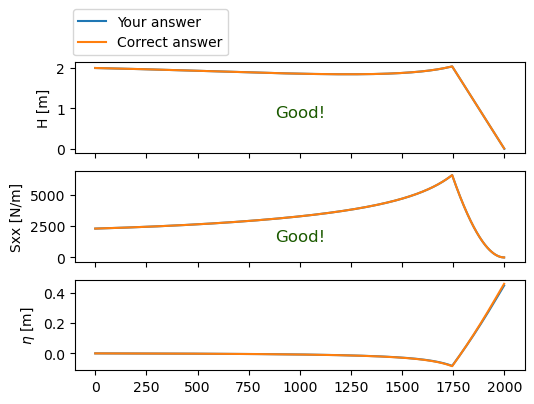

In [6]:
angle = 30  # The offshore wave angle


def W3_wave_setup(x_range, H0, T, h0, slope, angle):
    # The environmental conditions
    x = x_range  # the horizontal axis
    zbed = -h0 + slope * x  # bed elevation [m]
    h = -zbed  # still water depth [m]
    h[h < 0] = 0  # no negative depths

    # given conditions
    gamma = 0.8  # wave breaking ratio

    """ You can build on the results from normal-indicent waves"""

    L = wavelength(T, h)
    k = 2 * np.pi / L
    n = 0.5 * (1 + 2 * k * h / np.sinh(2 * k * h))

    c = L / T
    cg = n * c
    Ksh = np.sqrt(cg[0] / cg)

    theta = np.arcsin((np.sin(angle / 180 * np.pi) * c / c[0])) * 180 / np.pi
    Kref = np.sqrt(np.cos(angle / 180 * np.pi) / np.cos(theta / 180 * np.pi))
    
    Hsh = H0 * Ksh * Kref
    Hbr = gamma * h

    loc, index = intersection(Hsh, Hbr, x)

    H = Hsh
    H[index:] = Hbr[index:]

    E = np.zeros(len(x))
    E = 0.5 * rho * 9.81 * (0.5 * H)**2

    Sxx = np.zeros(len(x))
    Sxx = (n - 0.5 + n * np.cos(theta / 360 * 2 * np.pi)**2) * E

    eta = np.zeros(len(x))

    for i in range(len(x) - 1):
        eta[i + 1] = eta[i] - (Sxx[i + 1] - Sxx[i]) / (rho * 9.81 * h[i])
    
    return H, Sxx, eta, c, n  # c and n are useful later on


W3_plot_oblique_waves()

You can use the interactive widget below to assess the influence of changing environmental conditions on the wave characteristics

In [7]:
W3_show_oblique_waves()

Output()

## 3) The shorewards directed force (Fx)

We dive a bit deeper into the force in the cross-shore direction that drives the wave setup (Fx). Can you calculate this force along the cross-shore for an alongshore uniform coast? For this question, you can consider using a similar approach as the setup is calculated, by using forward euler.

C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\1227063608.py:13: RuntimeWarning: invalid value encountered in divide
  L = 9.81 * T**2 / ( 2 * np.pi) * np.tanh(2 * np.pi * d / L)
C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\3560922319.py:9: RuntimeWarning: divide by zero encountered in scalar power
  beta = alpha * (np.tanh(alpha)) ** -0.5
C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\3560922319.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  beta = alpha * (np.tanh(alpha)) ** -0.5


Matplotlib(Figure, dpi=100)
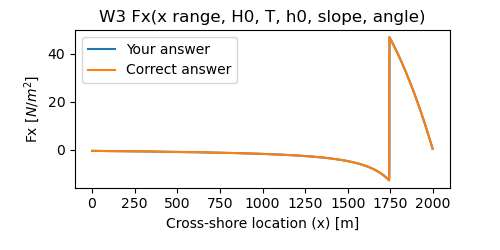

In [8]:
def W3_Fx(x_range, H0, T, h0, slope, angle):
    """It is recommended to use the earlier defined function W3_wave_setup()"""
    H, Sxx, eta, c, n = W3_wave_setup(x_range, H0, T, h0, slope, angle)

    x = x_range
    
    Fx = np.zeros(len(x))
    
    for i in range(len(x) - 1):
        Fx[i] = -(Sxx[i + 1] - Sxx[i]) / (x[1] - x[0])
    
    return Fx


W3_plot_Fx()

In [9]:
W3_show_Fx()

Output()

## 4) Alongshore shear stresses (Syx) and alongshore force (Fy).

Can you compute the radiation shear stress in y direction (Syx)?

C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\1227063608.py:13: RuntimeWarning: invalid value encountered in divide
  L = 9.81 * T**2 / ( 2 * np.pi) * np.tanh(2 * np.pi * d / L)
C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\3560922319.py:9: RuntimeWarning: divide by zero encountered in scalar power
  beta = alpha * (np.tanh(alpha)) ** -0.5
C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\3560922319.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  beta = alpha * (np.tanh(alpha)) ** -0.5


Matplotlib(Figure, dpi=100)
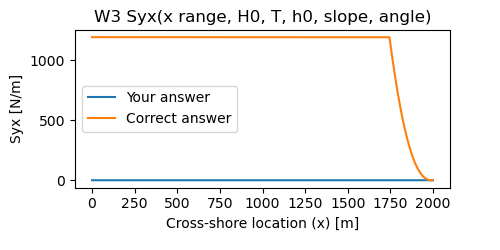

In [10]:
def W3_Syx(x_range, H0, T, h0, slope, angle):
    """It is recommended to use the earlier defined function W3_wave_setup()"""
    H, Sxx, eta, c, n = W3_wave_setup(x_range, H0, T, h0, slope, angle)

    Syx = np.ones(len(x_range))

    return Syx


W3_plot_Syx()

And can you compute the alongshore force (Fy) for an alongshore uniform coast?

Matplotlib(Figure, dpi=100)
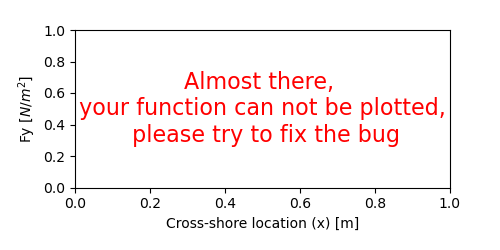

In [11]:
def W3_Fy(x_range, H0, T, h0, slope, angle):
    """It is recommended to use the earlier defined function(s)"""
    x = x_range
    ...

    return Fy


W3_plot_Fy()

In [12]:
W3_show_Syx_Fy()

Output()

## 5) Longshore current (V)

Can you calculate the distribution of the longshore current, following expression 5.82 in the book. For simplicity we assume that in this equation h is equal to the still water depth, and the friction factor $c_f$ is 0.01.

C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\1227063608.py:13: RuntimeWarning: invalid value encountered in divide
  L = 9.81 * T**2 / ( 2 * np.pi) * np.tanh(2 * np.pi * d / L)


Matplotlib(Figure, dpi=100)
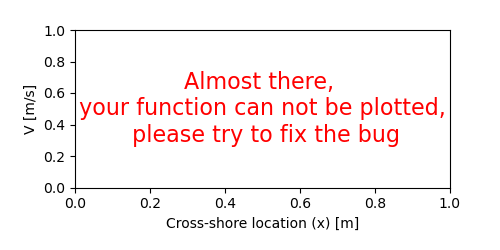

In [13]:
cf = 0.01


def W3_V(x_range, H0, T, h0, slope, angle, cf):
    # The environmental conditions
    x = x_range  # the horizontal axis
    zbed = -h0 + slope * x  # bed elevation [m]
    h = -zbed  # still water depth [m]
    h[h < 0] = 0  # no negative depths

    # With
    gamma = 0.8

    """It is recommended to use the earlier defined function W3_wave_setup()"""
    H, Sxx, eta, c, n = W3_wave_setup(x_range, H0, T, h0, slope, angle)

    ...

    return V


W3_plot_V()

In [14]:
W3_show_V()

Output()

## 6) Wave induced local current, orbital velocity

Can you calculate the amplitude of the velocity (u0) near the bed through the linear wave theory?

C:\Users\tpvan\AppData\Local\Temp\ipykernel_22820\1227063608.py:13: RuntimeWarning: invalid value encountered in divide
  L = 9.81 * T**2 / ( 2 * np.pi) * np.tanh(2 * np.pi * d / L)


Matplotlib(Figure, dpi=100)
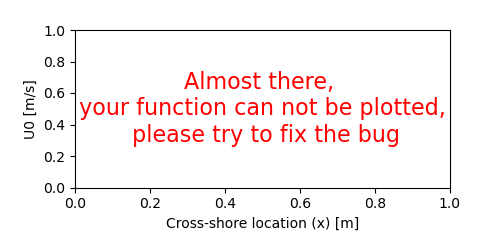

In [15]:
def W3_u0(x_range, H0, T, h0, slope, angle):
    """It is recommended to use the earlier defined function W3_wave_setup()"""
    H, Sxx, eta, c, n = W3_wave_setup(x_range, H0, T, h0, slope, angle)

    L = c * T
    k = 2 * np.pi / L  # The wave number

    snell_constant = np.sin(np.deg2rad(angle)) / c[0]  # apply snell's law
    theta_radians = np.arcsin(snell_constant * c)

    # page 199 of the book
    omega = 2 * np.pi / T
    u0 = 0.5 * omega * H / (np.sin(theta_radians) * k * h)

    return u0


W3_plot_u0()

In [16]:
W3_show_U0()

Output()